In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as spy
import warnings
from scipy.stats import t
warnings.filterwarnings('ignore')

# Defining Problem Statement

<b>Business Problem: </b> The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).nditional and marginal probabilities along with their insights/impact on the business.

# Analysing basic metrics

<b> 1.1: Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary </b>

In [2]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [5]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


<b> Descriptive Analysis </b>

- User_ID Distribution: Evenly spread from 1,000,001 to 1,006,040, indicating no apparent clustering.

- Occupation Distribution: Occupations range widely from 0 to 20, with a mean around 8.08, suggesting diversity in the dataset.

- Marital Status Distribution: The dataset slightly favors unmarried individuals (mean ~0.41), but the difference isn't significant.

- Product Category Diversity: Products span a broad range from 1 to 20, with a mean around 5.40, implying a diverse set of items purchased.

- Purchase Amount Spread: Purchase amounts vary notably from 12 to 23,961, with a mean around 9,264, showcasing a wide range of spending habits.

<b> Statistical Summary </b>

In [8]:
# for unique list of purchase, listed in percentage
sr = df['Purchase'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

Purchase
7011     0.03
7193     0.03
6855     0.03
6891     0.03
7012     0.03
         ... 
23491    0.00
18345    0.00
3372     0.00
855      0.00
21489    0.00
Name: proportion, Length: 18105, dtype: float64

- The percentages range from 0.00% to 0.03%, indicating the proportion of each unique purchase amount relative to the total purchases.

In [9]:
# Customers Marital Status (listed in %)
marital_status = df['Marital_Status'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res

Marital_Status
0    59.03
1    40.97
Name: proportion, dtype: float64

- Unmarried customers constitute approximately 60.47% of the dataset.
- Married customers constitute approximately 39.53% of the dataset.

In [10]:
# Rating of the purchase made (listed in %)
rating = df['Purchase'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Purchase,proportion
0,7011,0.03
1,7193,0.03
2,6855,0.03
3,6891,0.03
4,7012,0.03
...,...,...
18100,23491,0.00
18101,18345,0.00
18102,3372,0.00
18103,855,0.00


- Ratings vary from 0.00% to 0.03%, indicating the proportion of purchases at each rating level.

<b> Memory Optimization </b>

In [11]:
# Converting User_ID column datatype to int32
df['User_ID'] = df['User_ID'].astype('int32')

In [12]:
# Updating 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

In [13]:
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [14]:
# Converting 'Age' column datatype to category
df['Age'] = df['Age'].astype('category')

In [15]:
# Converting 'Product_Category' column datatype to int8
df['Product_Category'] = df['Product_Category'].astype('int8')

In [16]:
# Converting 'Occupation' column's datatype to int8
df['Occupation'] = df['Occupation'].astype('int8')

In [17]:
# Converting 'City_Category' column's datatype to category
df['City_Category'] = df['City_Category'].astype('category')

In [18]:
# Converting 'Stay_In_Current_City_Years' column's datatype to category
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


- Earlier the dataframe took 42.0+ MB of memory but the memory usage is reduced to 17.8+ MB (57.62% reduction in the memory usage).

In [20]:
# For measurable quantities
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


The dataset provides information on the following variables:

- User_ID: It contains unique identification numbers assigned to each user. The dataset includes a total of 550,068 user records.

- Occupation: This variable represents the occupation of the users. The dataset includes values ranging from 0 to 20, indicating different occupations.

- Product_Category: It indicates the category of the products purchased by the users. The dataset includes values ranging from 1 to 20, representing different product categories.

- Purchase: This variable represents the purchase amount made by each user. The dataset includes purchase values ranging from 12 to 23,961.

In [21]:
# description of columns with 'object' datatype
df.describe(include = 'object')

,Product_ID,Gender
count,550068,550068
unique,3631,2
top,P00265242,M
freq,1880,414259


The provided data represents summary statistics for two variables: Product_ID and Gender. Here is a breakdown of the information:

- Product_ID: There are 3,631 unique values observed in this variable, indicating that there are 3,631 different products. The top value, which appears most frequently, is 'P00265242'. This value occurs 1,880 times in the dataset.

- Gender: There are 2 unique values in this variable, which suggests that it represents a binary category. The top value is 'M', indicating that 'M' is the most common gender category. It appears 414,259 times in the dataset.

- These summary statistics provide insights into the distribution and frequency of the Product_ID and Gender variables. They give an understanding of the number of unique products, the most common product, and the dominant gender category in the dataset.

<b> 1.2: Non-Graphical Analysis: Value counts and unique attributes </b>

In [22]:
# How many unique customers' data is given in the dataset?
df['User_ID'].nunique()

5891

- We have the data of 5891 customers who made at least one purchase on Black Friday in Walmart.

In [22]:
# Total number of transactions made by each gender
np.round(df['Gender'].value_counts(normalize = True) * 100, 2)

Gender
M    75.31
F    24.69
Name: proportion, dtype: float64

- It is clear from the above that out of every four transactions, three are made by males.

In [23]:
np.round(df['Occupation'].value_counts(normalize = True) * 100, 2).cumsum()

Occupation
4     13.15
0     25.81
7     36.56
1     45.18
17    52.46
20    58.56
12    64.23
14    69.19
2     74.02
16    78.63
6     82.33
3     85.54
10    87.89
5     90.10
15    92.31
11    94.42
19    95.96
13    97.36
18    98.56
9     99.70
8     99.98
Name: proportion, dtype: float64

- It can be inferred from the above that 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order of the total transactions' share.)

In [24]:
np.round(df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2)

Stay_In_Current_City_Years
1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: proportion, dtype: float64

- From the above result, it is clear that majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city.

In [25]:
np.round(df['Product_Category'].value_counts(normalize = True).head(10) * 100, 2).cumsum()

Product_Category
5     27.44
1     52.96
8     73.67
11    78.09
2     82.43
6     86.15
3     89.82
4     91.96
16    93.75
15    94.89
Name: proportion, dtype: float64

- It can be inferred from the above result that 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2.

<b> How many unique customers are there for each gender? </b>

In [26]:
df_gender_dist = pd.DataFrame(df.groupby(by = ['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_gender_dist['percent_share'] = np.round(df_gender_dist['unique_customers'] / df_gender_dist['unique_customers'].sum() * 100, 2)
df_gender_dist

,Gender,unique_customers,percent_share
0,F,1666,28.28
1,M,4225,71.72


<b> How many transactions are made by each gender category? </b>

In [27]:
df.groupby(by = ['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

In [28]:
print('Average number of transactions made by each Male on Black Friday:', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday:', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday: 98
Average number of transactions made by each Female on Black Friday: 82


<b> What is the total Revenue generated by Walmart from each Gender? </b>

In [29]:
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


<b> What is the average total purchase made by each user in each gender? </b>

In [30]:
df1 = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Gender')['Average_Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Average_Purchase, dtype: float64

<b> What is the Average Revenue generated by Walmart from each Gender per transaction? </b>

In [31]:
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})

,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


<b> How many unique customers are there for each Marital Status? </b>

In [32]:
df_marital_status_dist = pd.DataFrame(df.groupby(by = ['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_marital_status_dist['percent_share'] = np.round(df_marital_status_dist['unique_customers'] / df_marital_status_dist['unique_customers'].sum() * 100, 2)
df_marital_status_dist

,Marital_Status,unique_customers,percent_share
0,Married,2474,42.0
1,Single,3417,58.0


<b> How many transactions are made by each Marital Status category? </b>

In [33]:
df.groupby(by = ['Marital_Status'])['User_ID'].count()

Marital_Status
Married    225337
Single     324731
Name: User_ID, dtype: int64

In [34]:
print('Average number of transactions made by each user with marital status Married:', round(225337 / 2474))
print('Average number of transactions made by each with marital status Single:', round(324731 / 3417))

Average number of transactions made by each user with marital status Married: 91
Average number of transactions made by each with marital status Single: 95


<b> What is the total Revenue generated by Walmart from each Marital Status? </b>

In [35]:
df_marital_status_revenue = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_marital_status_revenue['percent_share'] = np.round((df_marital_status_revenue['Purchase'] / df_marital_status_revenue['Purchase'].sum()) * 100, 2)
df_marital_status_revenue

,Marital_Status,Purchase,percent_share
0,Single,3008927447,59.05
1,Married,2086885295,40.95


<b> What is the average total purchase made by each user in each marital status? </b>

In [36]:
df1 = pd.DataFrame(df.groupby(by = ['Marital_Status', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Marital_Status')['Average_Purchase'].mean()

Marital_Status
Married    354249.753013
Single     510766.838737
Name: Average_Purchase, dtype: float64

In [37]:
df_age_dist = pd.DataFrame(df.groupby(by = ['Age'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
df_age_dist['percent_share'] =  np.round(df_age_dist['unique_customers'] / df_age_dist['unique_customers'].sum() * 100, 2)
df_age_dist['cumulative_percent'] =  df_age_dist['percent_share'].cumsum()
df_age_dist

,Age,unique_customers,percent_share,cumulative_percent
2,26-35,2053,34.85,34.85
3,36-45,1167,19.81,54.66
1,18-25,1069,18.15,72.81
4,46-50,531,9.01,81.82
5,51-55,481,8.16,89.98
6,55+,372,6.31,96.29
0,0-17,218,3.70,99.99


[]

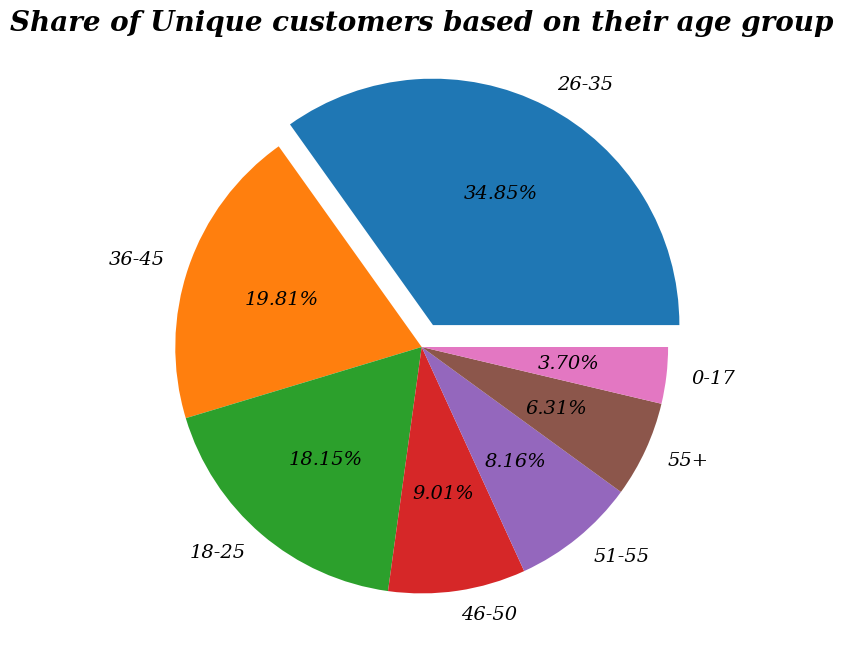

In [38]:
plt.figure(figsize = (8, 8))
plt.title('Share of Unique customers based on their age group', fontdict = {'fontsize' : 20,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 600} )
plt.pie(x = df_age_dist['percent_share'], labels = df_age_dist['Age'], 
        explode = [0.1] + [0] * 6, autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()

In [39]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [40]:
df_age_revenue = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)
df_age_revenue['percent_share'] = np.round((df_age_revenue['Purchase'] / df_age_revenue['Purchase'].sum()) * 100, 2)
df_age_revenue['cumulative_percent_share'] = df_age_revenue['percent_share'].cumsum()
df_age_revenue

,Age,Purchase,percent_share,cumulative_percent_share
2,26-35,2031770578,39.87,39.87
3,36-45,1026569884,20.15,60.02
1,18-25,913848675,17.93,77.95
4,46-50,420843403,8.26,86.21
5,51-55,367099644,7.20,93.41
6,55+,200767375,3.94,97.35
0,0-17,134913183,2.65,100.00


[]

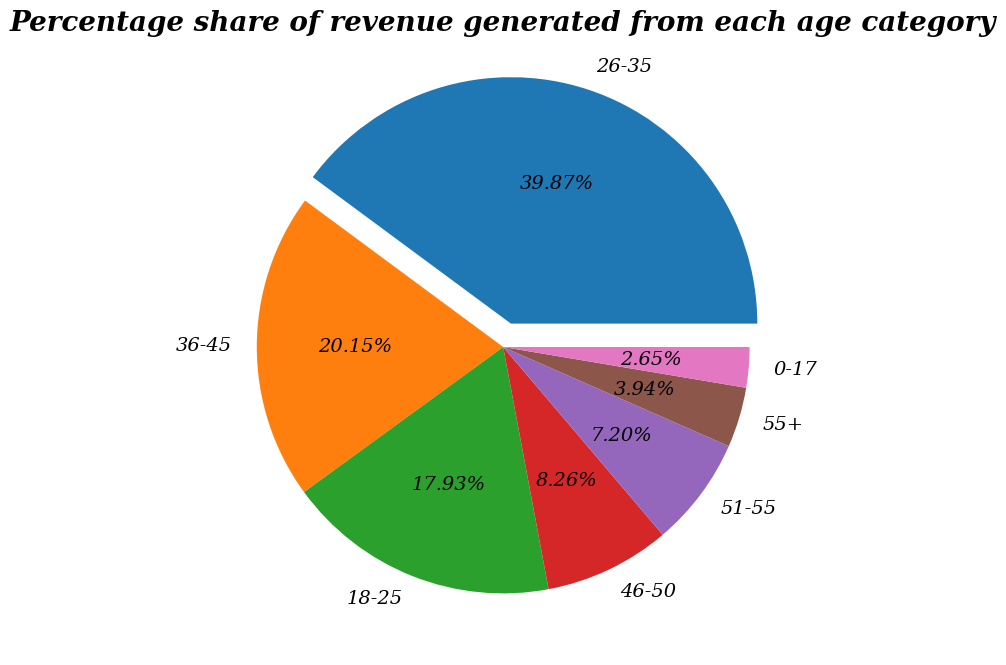

In [41]:
plt.figure(figsize = (8, 8))
plt.title('Percentage share of revenue generated from each age category', fontdict = {'fontsize' : 20,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 600} )
plt.pie(x = df_age_revenue['percent_share'], labels = df_age_revenue['Age'], 
        explode = [0.1] + [0] * 6, autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()

In [42]:
df_city_dist = pd.DataFrame(df.groupby(by = ['City_Category'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_city_dist['percent_share'] = np.round((df_city_dist['unique_customers'] / df_city_dist['unique_customers'].sum()) * 100, 2)
df_city_dist['cumulative_percent_share'] = df_city_dist['percent_share'].cumsum()
df_city_dist

,City_Category,unique_customers,percent_share,cumulative_percent_share
0,A,1045,17.74,17.74
1,B,1707,28.98,46.72
2,C,3139,53.28,100.00


In [43]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

<b> What is the revenue generated from different cities? </b>

In [44]:
df_city_revenue = df.groupby(by = ['City_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_city_revenue['percent_share'] = np.round((df_city_revenue['Purchase'] / df_city_revenue['Purchase'].sum()) * 100, 2)
df_city_revenue['cumulative_percent_share'] = df_city_revenue['percent_share'].cumsum()
df_city_revenue

,City_Category,Purchase,percent_share,cumulative_percent_share
0,B,2115533605,41.52,41.52
1,C,1663807476,32.65,74.17
2,A,1316471661,25.83,100.00


In [45]:
df.groupby(by = ['Product_Category'])['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

<b> What is the revenue generated from different product categories? </b>

In [46]:
df_product_revenue = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_product_revenue['percent_share'] = np.round((df_product_revenue['Purchase'] / df_product_revenue['Purchase'].sum()) * 100, 2)
df_product_revenue['cumulative_percent_share'] = df_product_revenue['percent_share'].cumsum()
df_product_revenue

,Product_Category,Purchase,percent_share,cumulative_percent_share
0,1,1910013754,37.48,37.48
1,5,941835229,18.48,55.96
2,8,854318799,16.77,72.73
3,6,324150302,6.36,79.09
4,2,268516186,5.27,84.36
5,3,204084713,4.00,88.36
6,16,145120612,2.85,91.21
7,11,113791115,2.23,93.44
8,10,100837301,1.98,95.42
9,15,92969042,1.82,97.24


In [47]:
top5 = df_product_revenue.head(5)['Purchase'].sum() /  df_product_revenue['Purchase'].sum()
top5 = np.round(top5 * 100, 2)
print(f'Top 5 product categories from which Walmart makes {top5} % of total revenue are : {list(df_product_revenue["Product_Category"].head())}')

Top 5 product categories from which Walmart makes 84.36 % of total revenue are : [1, 5, 8, 6, 2]


[]

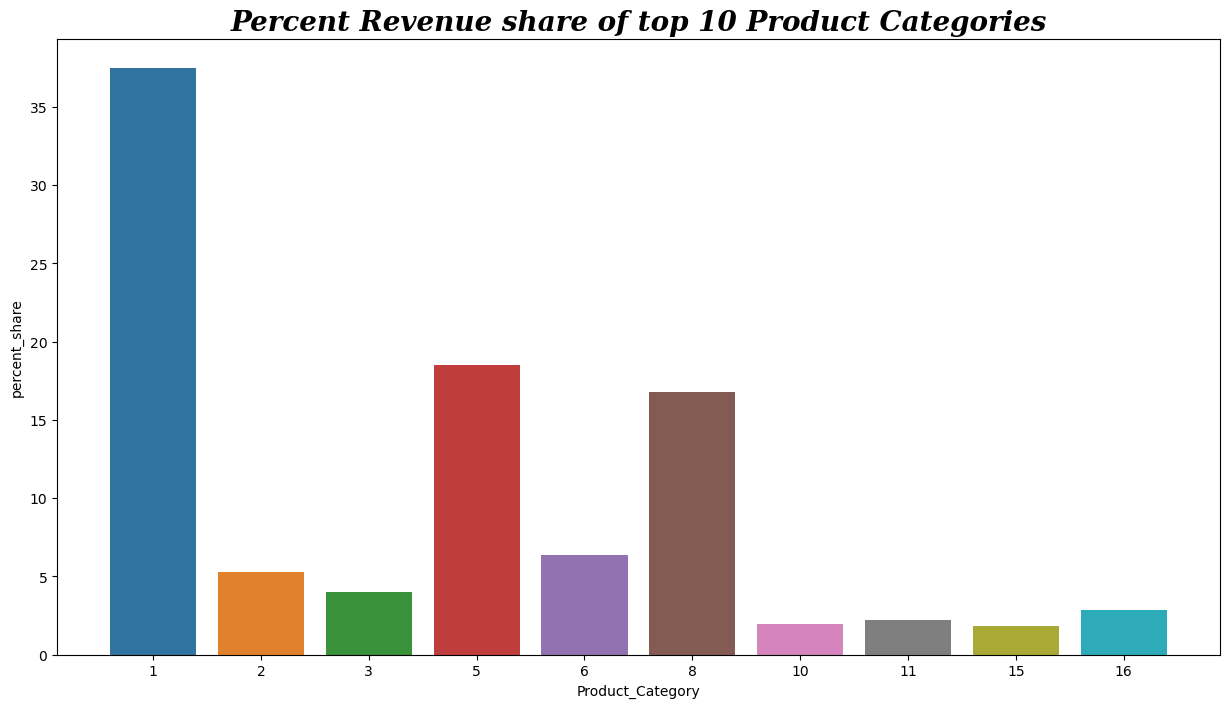

In [48]:
plt.figure(figsize = (15, 8))
plt.title('Percent Revenue share of top 10 Product Categories', fontsize = 20, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
sns.barplot(data = df_product_revenue, x = df_product_revenue.head(10)['Product_Category'], y = df_product_revenue.head(10)['percent_share'])
plt.plot()

<b> What is the total Revenue generated by Walmart from each Gender? </b>

In [49]:
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


<b> What is the Average Revenue generated by Walmart from each Gender per transaction? </b>

In [50]:
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})

,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


Distribution of number of Transactions:

[]

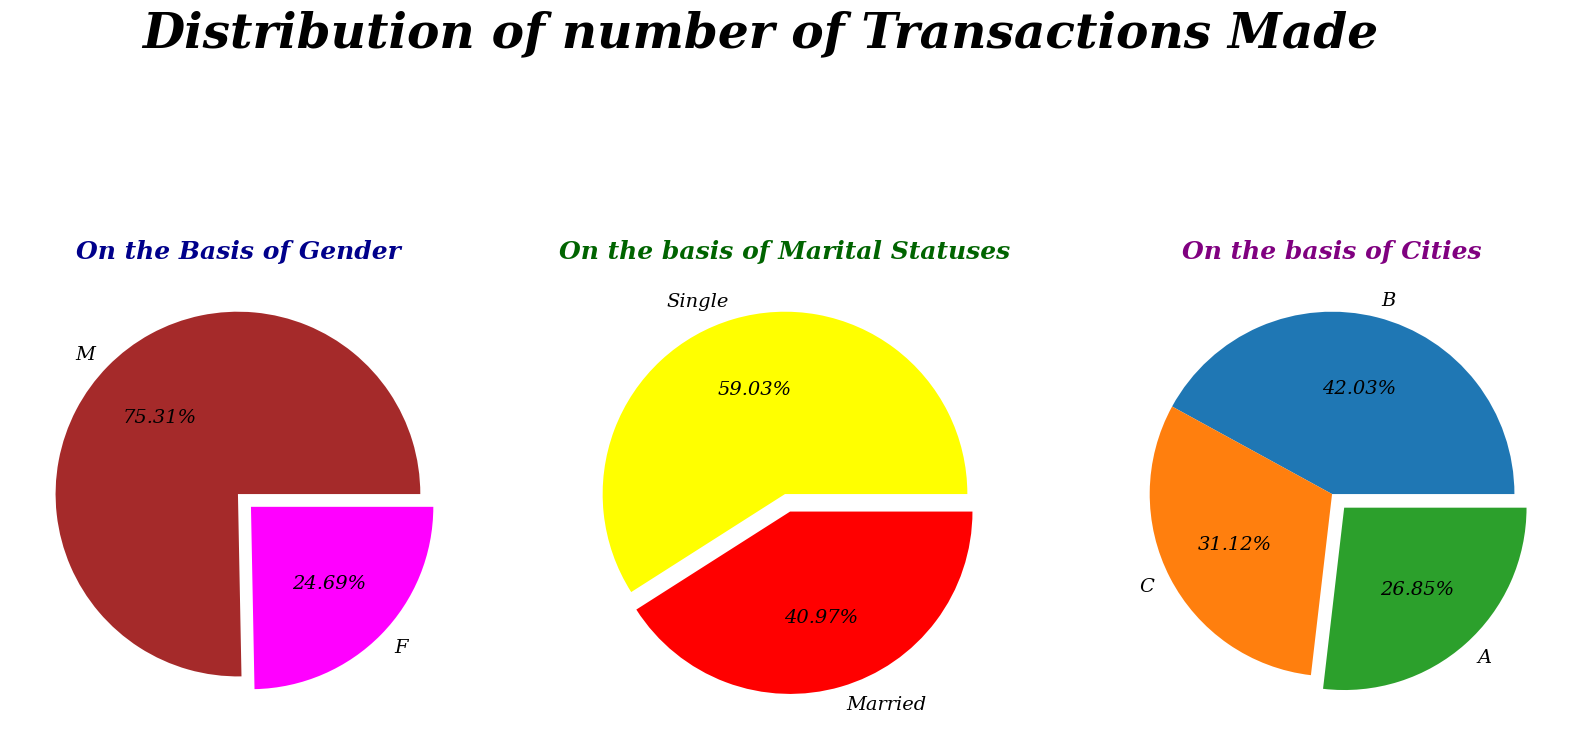

In [51]:
plt.figure(figsize = (20, 10))
plt.suptitle('Distribution of number of Transactions Made', fontsize = 35, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.subplot(1, 3, 1)
plt.title('On the Basis of Gender', color = 'darkblue', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_gender_dist = np.round(df['Gender'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_gender_dist.values, labels = df_gender_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['brown', 'magenta'])
plt.plot()
plt.subplot(1, 3, 2)
plt.title('On the basis of Marital Statuses', color = 'darkgreen', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_Marital_Status_dist = np.round(df['Marital_Status'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_Marital_Status_dist.values, labels = df_Marital_Status_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['yellow', 'red'])
plt.plot()
plt.subplot(1, 3, 3)
plt.title("On the basis of Cities", color = 'purple', fontdict = {'fontsize' : 18,
                                                'fontweight' : 555,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_City_Category_dist = np.round(df['City_Category'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_City_Category_dist.values, labels = df_City_Category_dist.index, 
        explode = [0, 0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()

<b> 1.3: Visual Analysis - Univariate & Bivariate </b>

<b> Univariate Analysis </b>

- For continuous variable(s): Distplot, countplot, histogram for univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

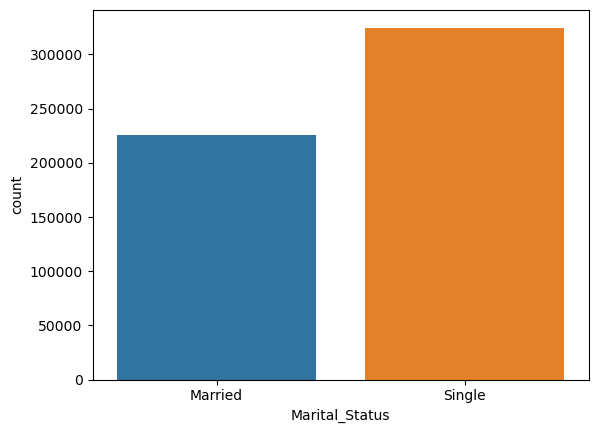

In [52]:
# Product Analysis - count plot
sns.countplot(data=df,x='Marital_Status')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

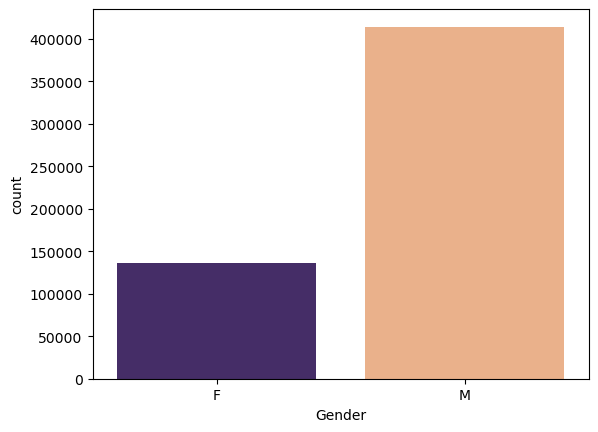

In [53]:
# Gender Analysis - Count Plot
sns.countplot(data=df,x='Gender',palette=['#432371',"#FAAE7B"])
plt.show

[]

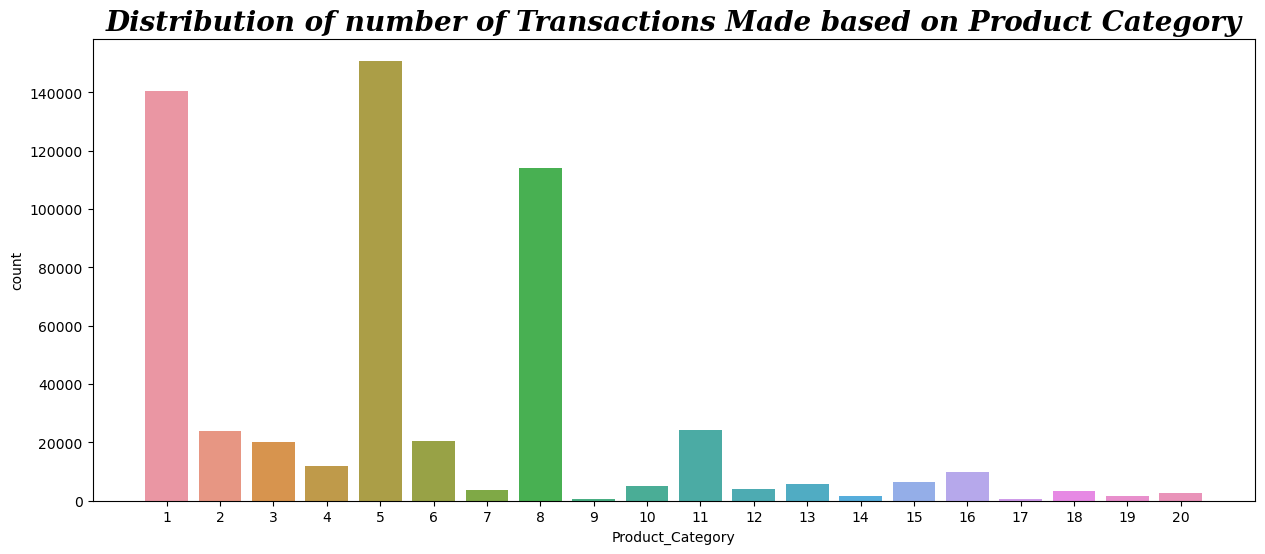

In [54]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Product Category', fontsize = 20, fontweight = 600, fontstyle = 'oblique', fontfamily = 'serif')
sns.countplot(data = df, x = 'Product_Category')
plt.plot()

[]

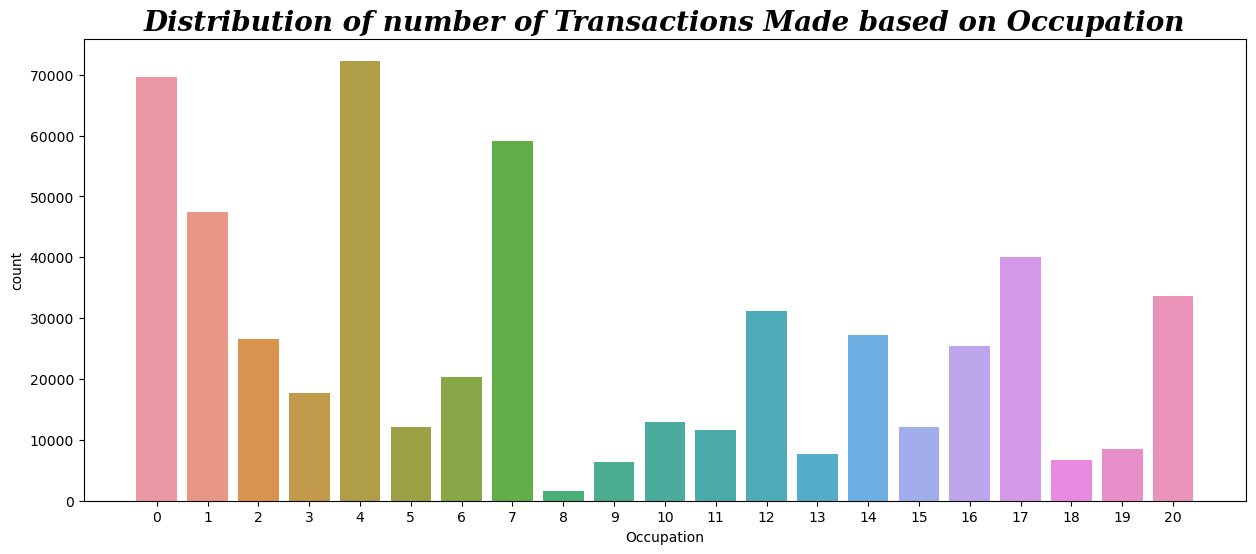

In [55]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Occupation', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.countplot(data = df, x = 'Occupation')
plt.plot()

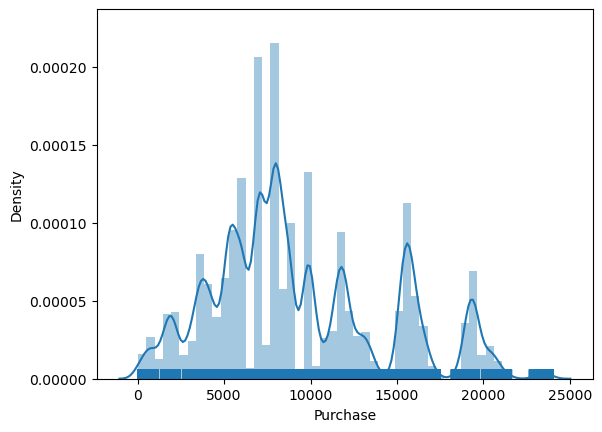

In [56]:
# Income Analysis - Distplot
sns.distplot(df.Purchase,rug=True)
plt.show()

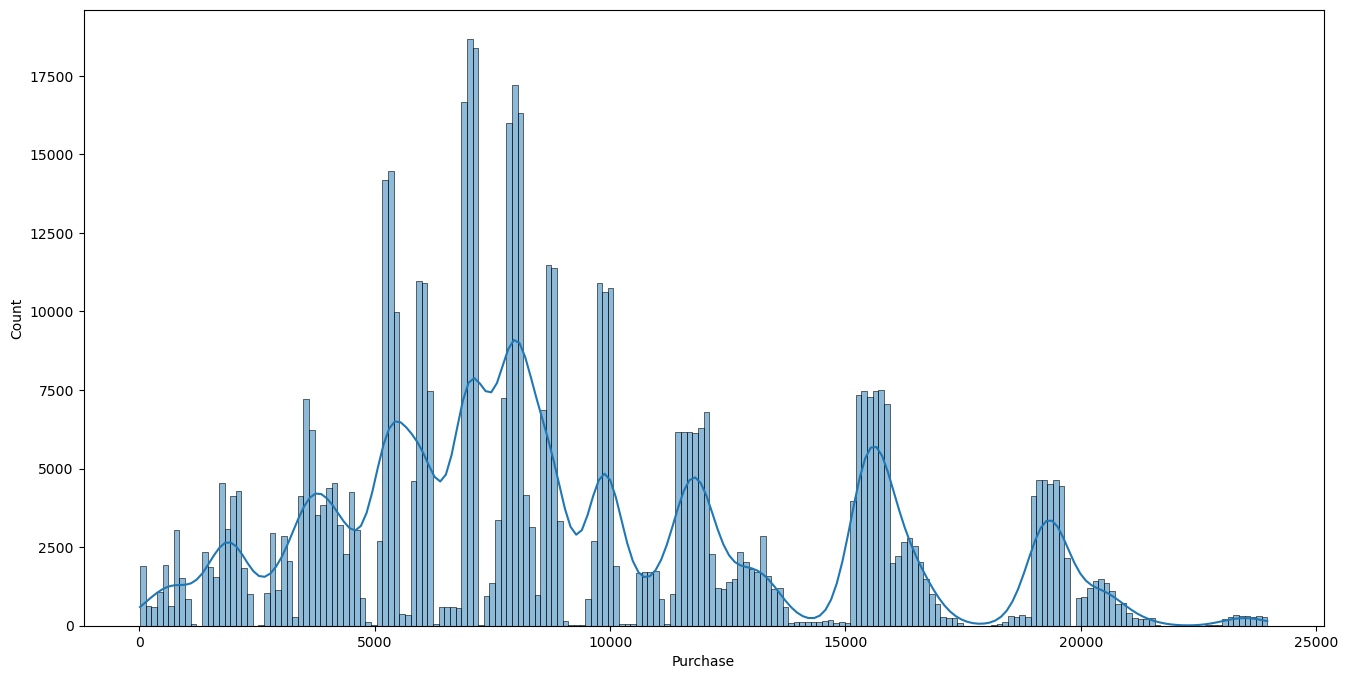

In [57]:
plt.figure(figsize = (16, 8))
sns.histplot(data = df, x = 'Purchase', kde = True, bins = 200)
plt.show()

[]

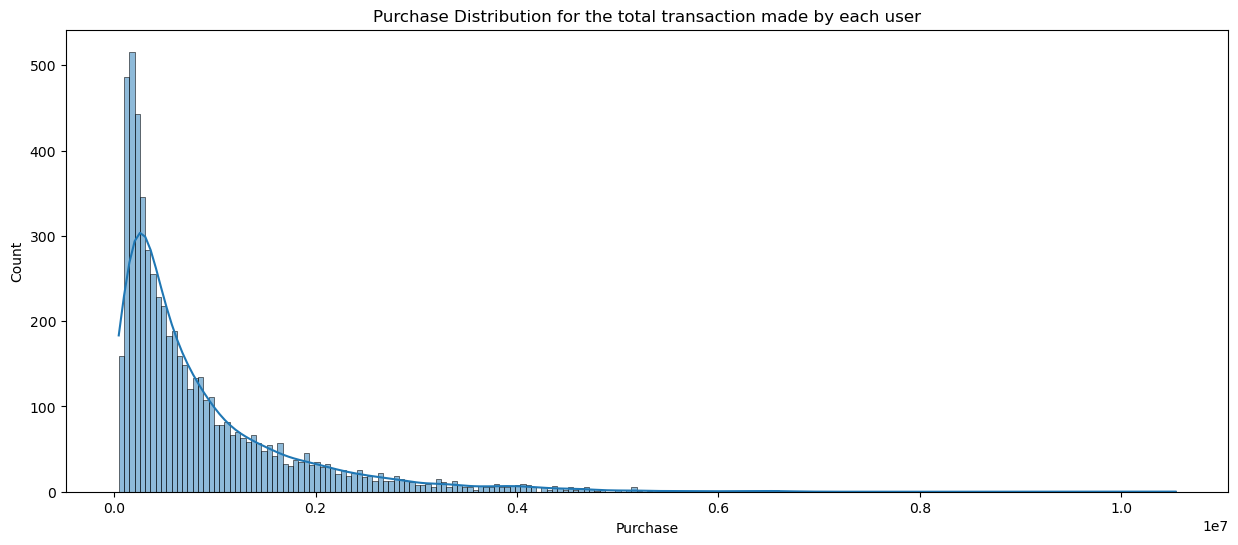

In [58]:
plt.figure(figsize = (15, 6))
plt.title('Purchase Distribution for the total transaction made by each user')
df_customer = df.groupby(by = 'User_ID')['Purchase'].sum()
sns.histplot(data = df_customer, kde = True, bins = 200)
plt.plot()

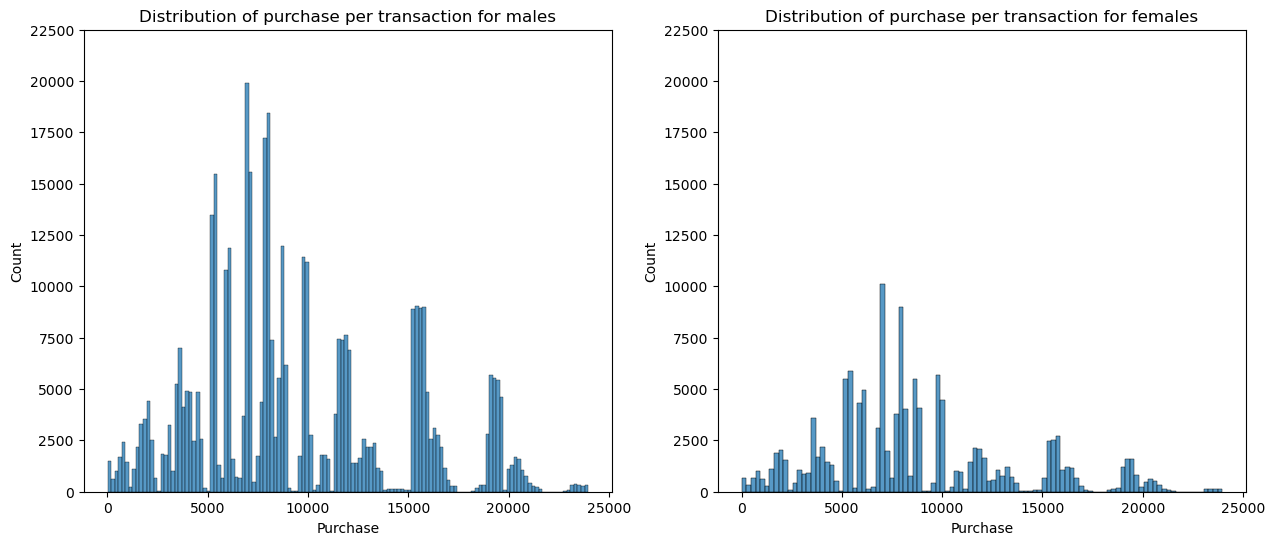

In [59]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
df_male = df[df['Gender'] == 'M']
sns.histplot(data = df_male, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.show()

In [60]:
df_cust_gender = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_cust_gender

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [61]:
df_male_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'M']
df_female_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'F']

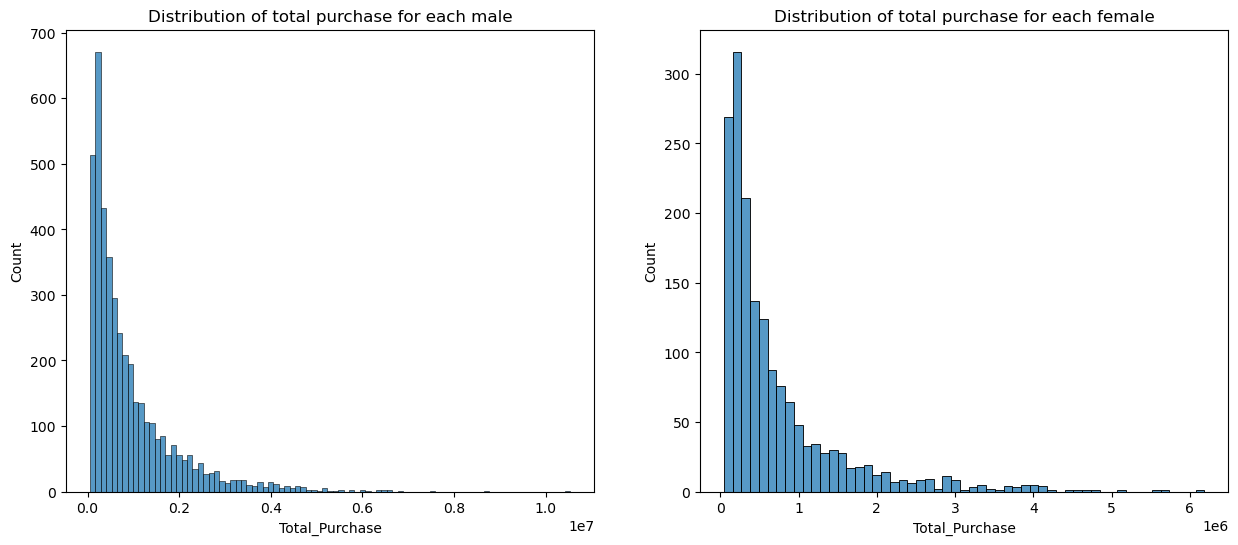

In [62]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.histplot(data = df_male_customer, x = 'Total_Purchase')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female_customer, x = 'Total_Purchase')
plt.show()

- For categorical variable(s): Boxplot

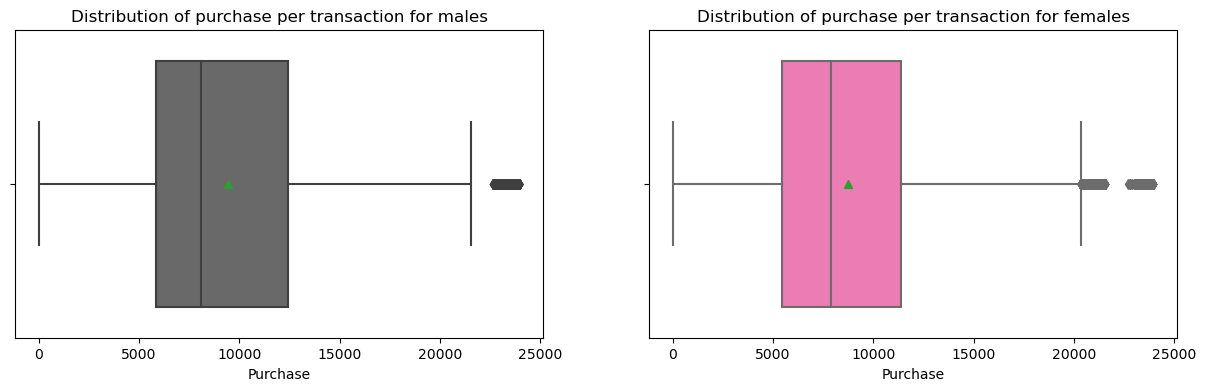

In [63]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data = df_male, x = 'Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data = df_female, x = 'Purchase', showmeans = True, color = 'hotpink')
plt.show()

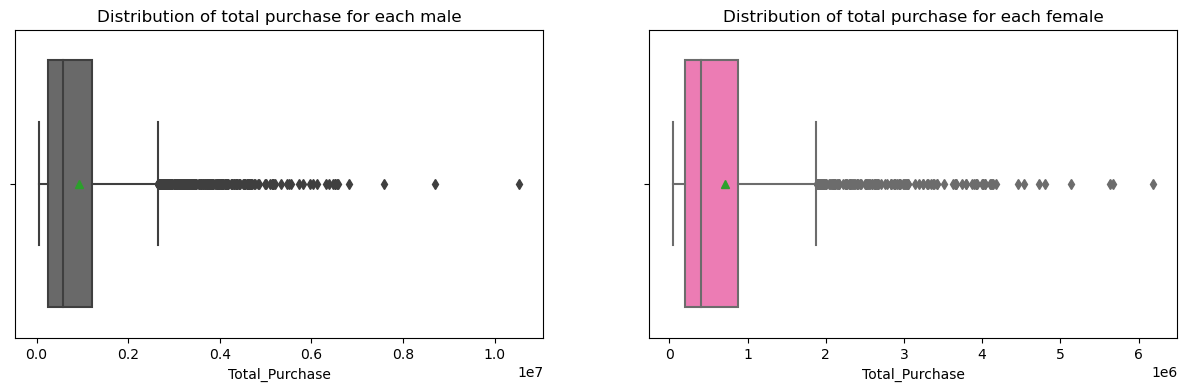

In [64]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = df_male_customer, x = 'Total_Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = df_female_customer, x = 'Total_Purchase', showmeans = True, color = 'hotpink')
plt.show()

In [65]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

[]

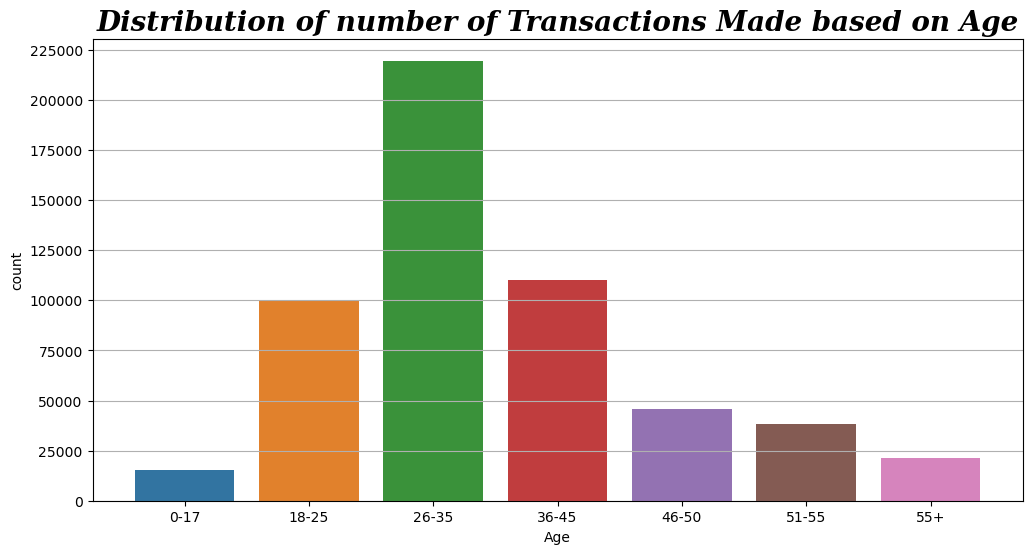

In [66]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of number of Transactions Made based on Age', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
plt.yticks(np.arange(0, 250001, 25000))
plt.grid('y')
sns.countplot(data = df, x = 'Age', 
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.plot()

[]

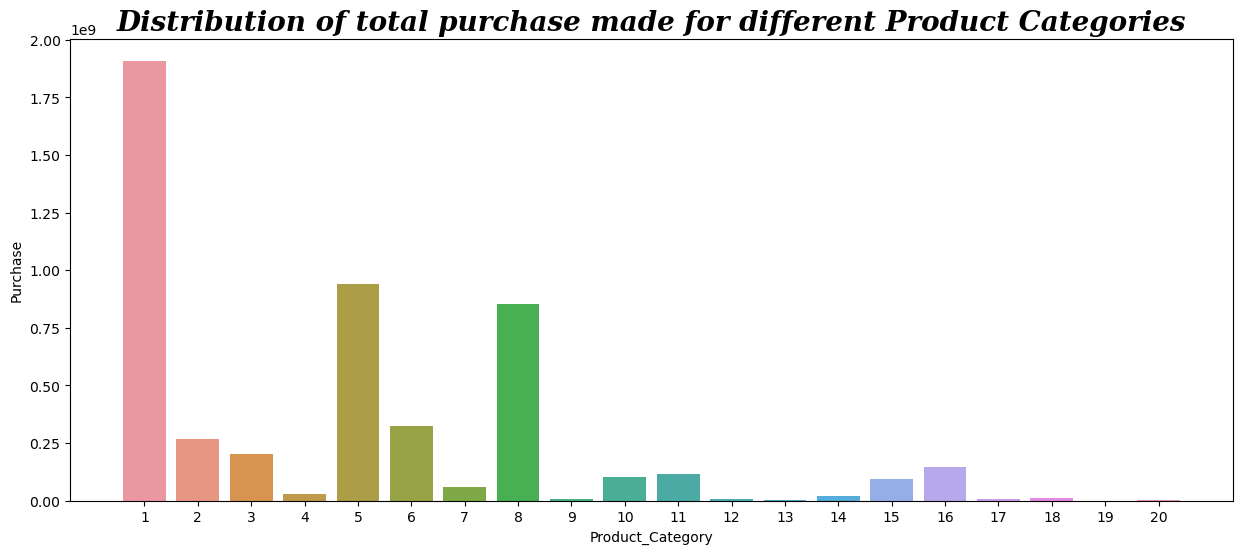

In [67]:
df_product_category = df.groupby(by = 'Product_Category')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase made for different Product Categories', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.barplot(data = df_product_category, x = 'Product_Category', y = 'Purchase')
plt.plot()

- For correlation: Heatmaps, Pairplots

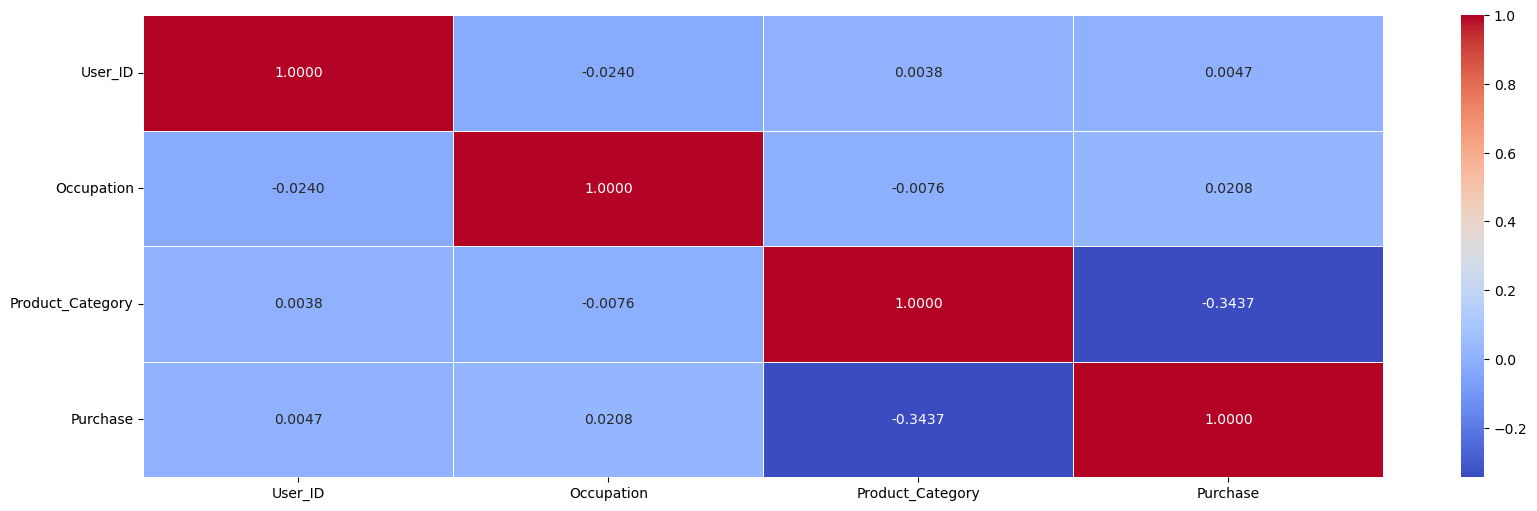

In [68]:
#Correlation HeatMap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 6))
ax = sns.heatmap(numeric_df.corr(), annot=True, fmt='.4f', linewidths=.5, cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

- Correlation between User_ID and Purchase is 0.0047
- Correlation between Occupation and Product_Category is -0.0076
- Correlation between Product_Category and User_ID is 0.0038
- Correlation between Purchase and Product_Category is -0.3437

<b> Bivariate Analysis </b>

[]

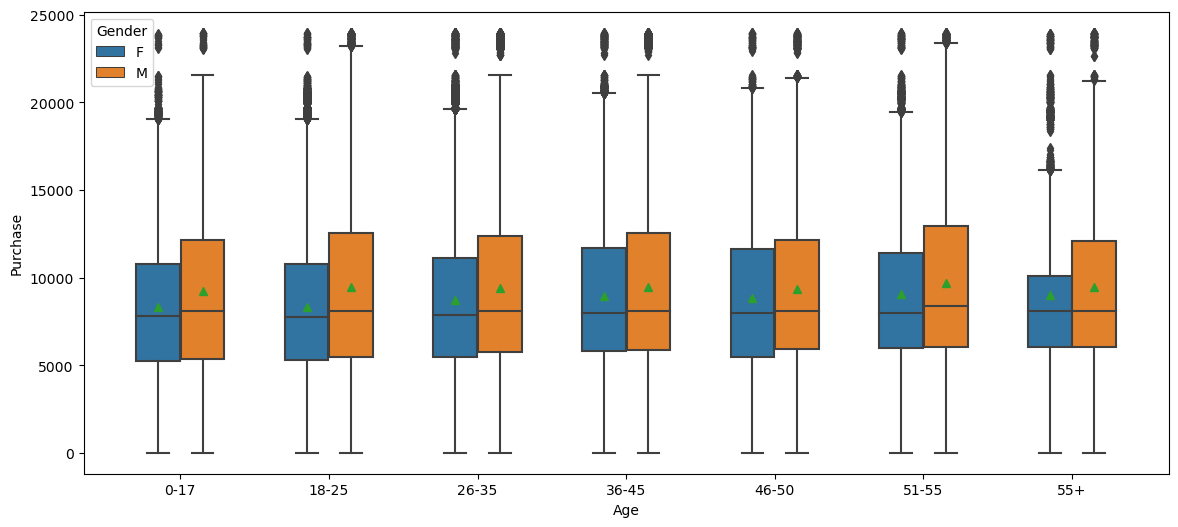

In [70]:
plt.figure(figsize = (14, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6)
plt.plot()

[]

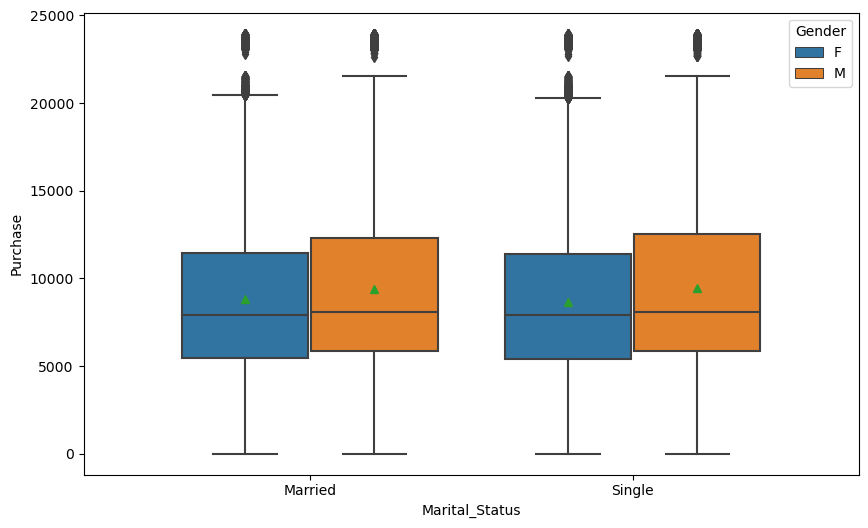

In [71]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True, width  = 0.8)
plt.plot()

[]

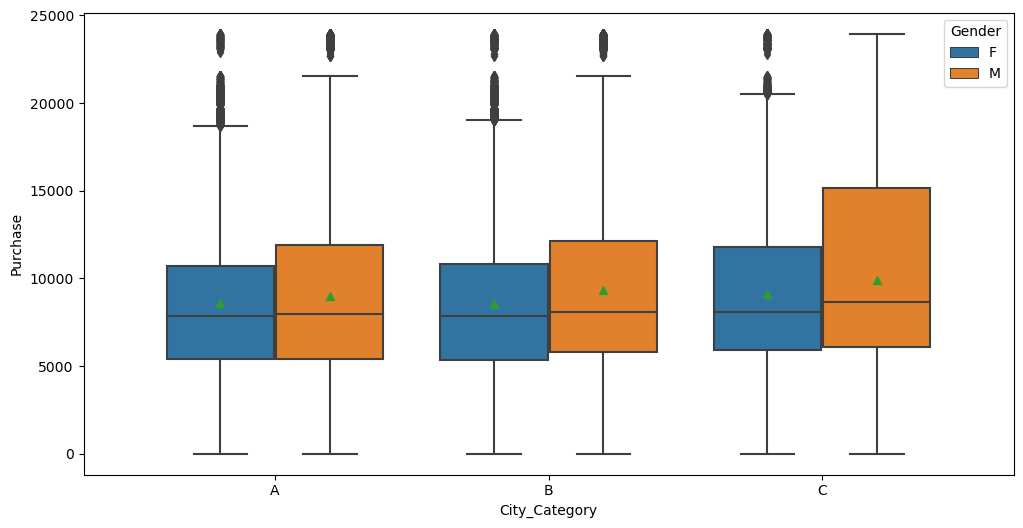

In [72]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

[]

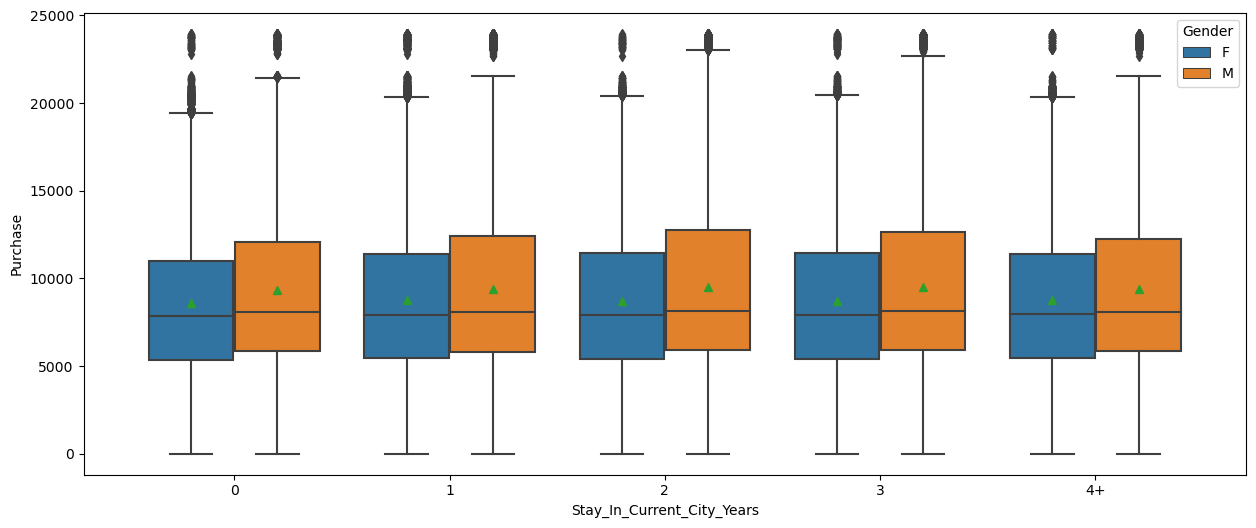

In [73]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

<b> Determining the mean purchase made by each user </b>

<b> For Males </b>
- How the deviations vary for different sample sizes?

In [74]:
df_male_customer

,Gender,User_ID,Total_Purchase
1666,M,1000002,810472
1667,M,1000003,341635
1668,M,1000004,206468
1669,M,1000005,821001
1670,M,1000007,234668
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [75]:
mean_purchases = []
for sample_size in range(50, 4000):
    sample_mean = df_male_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

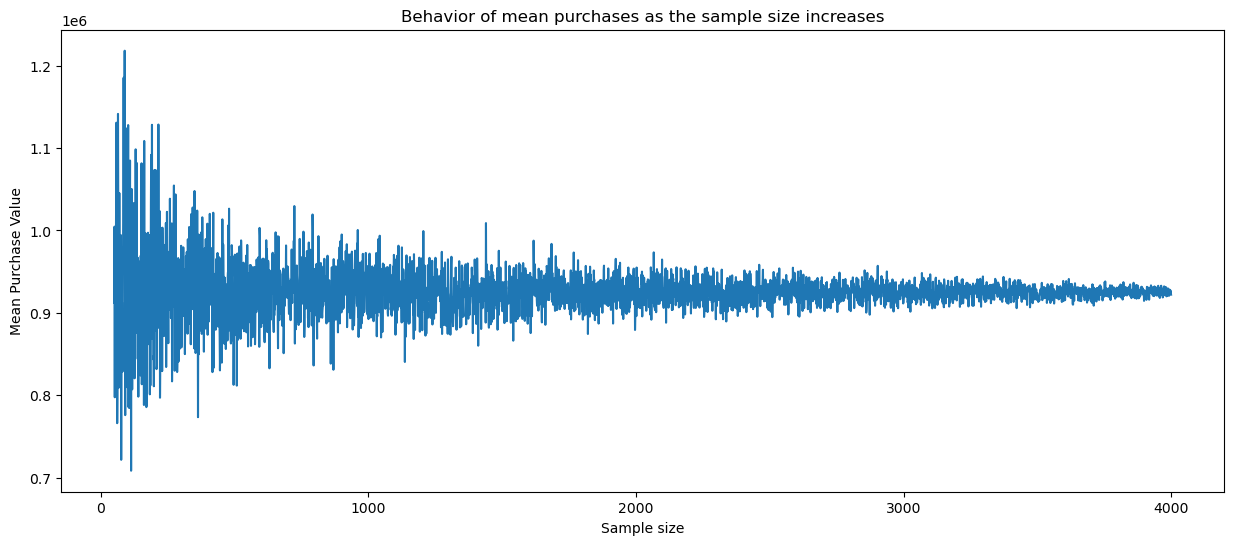

In [76]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 4000), mean_purchases)
plt.xticks(np.arange(0, 10001, 1000))
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

- Finding the confidence interval of each male's total spending on the Black Friday

In [77]:
means_male = []
size = df_male_customer['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_male_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_male.append(sample_mean)

[]

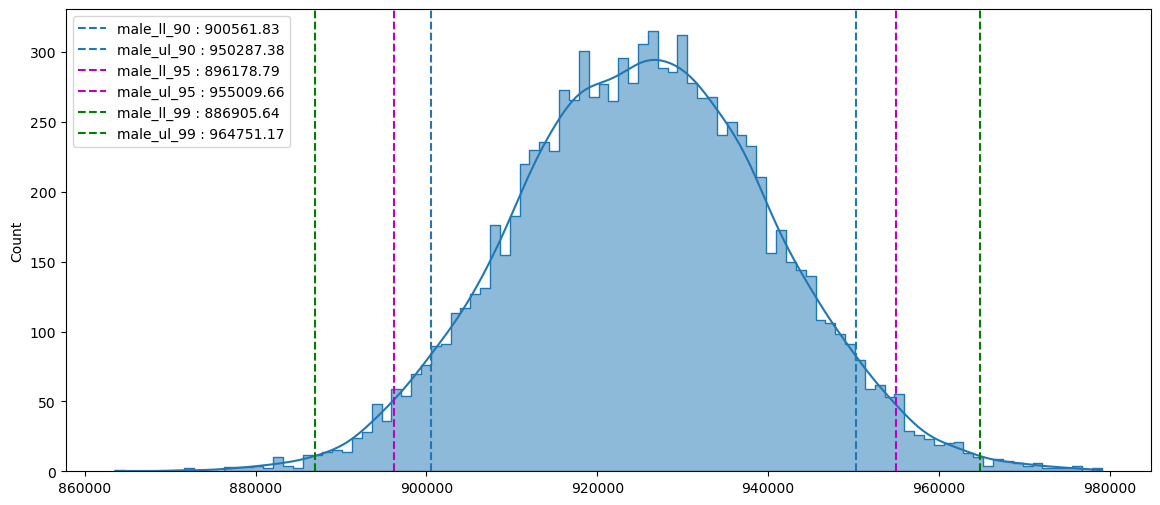

In [78]:
plt.figure(figsize = (14, 6))     

sns.histplot(means_male, kde = True, bins = 100, fill = True, element = 'step')
    
male_ll_90 = np.percentile(means_male, 5)

male_ul_90 = np.percentile(means_male, 95)

plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
  
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')

male_ll_95 = np.percentile(means_male, 2.5)
male_ul_95 = np.percentile(means_male, 97.5)
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')


male_ll_99 = np.percentile(means_male, 0.5)
male_ul_99 = np.percentile(means_male, 99.5)
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()    
plt.plot()       

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each male customer on Black Friday at Walmart, despite having data for only 4225 male individuals. This provides us with a reasonable approximation of the range within which the total purchase of each male customer falls, with a certain level of confidence

In [79]:
print(f"The population mean of total spending of each male will be approximately = {np.round(np.mean(means_male), 2)} ")

The population mean of total spending of each male will be approximately = 925406.88 


<b>For Females</b>
- How the deviations vary for different sample sizes?

In [80]:
df_female_customer

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
1661,F,1006035,956645
1662,F,1006036,4116058
1663,F,1006037,1119538
1664,F,1006038,90034


In [81]:
mean_purchases = []
for sample_size in range(50, 1600):
    sample_mean = df_female_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

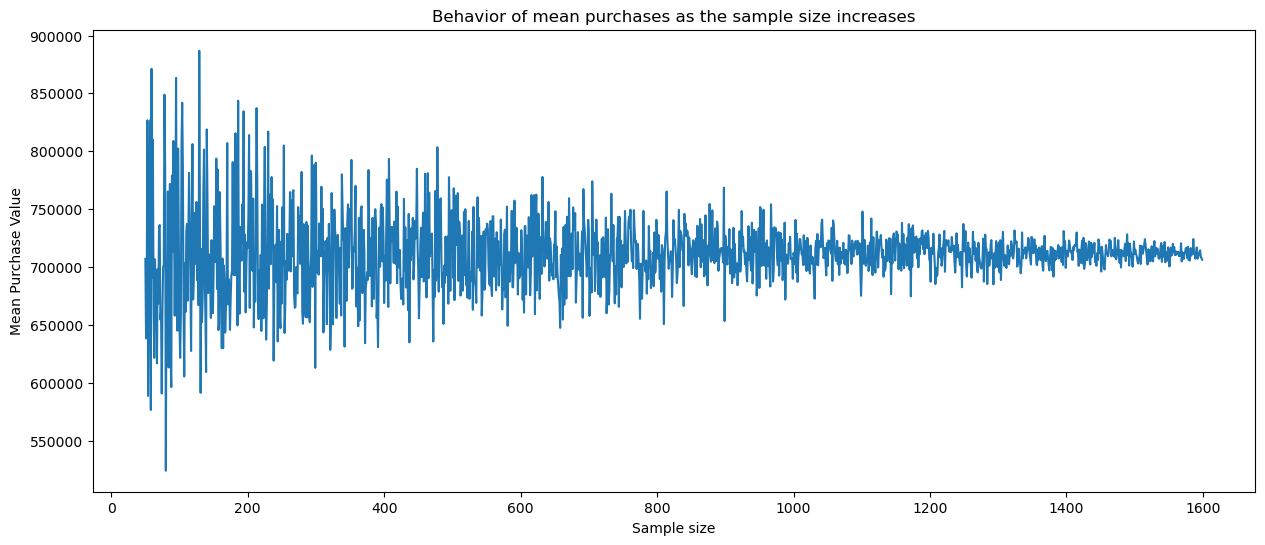

In [82]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1600), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

- Finding the confidence interval of each female's total spending on the Black Friday

In [83]:
means_female = []
size = df_female_customer['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_female_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_female.append(sample_mean)

[]

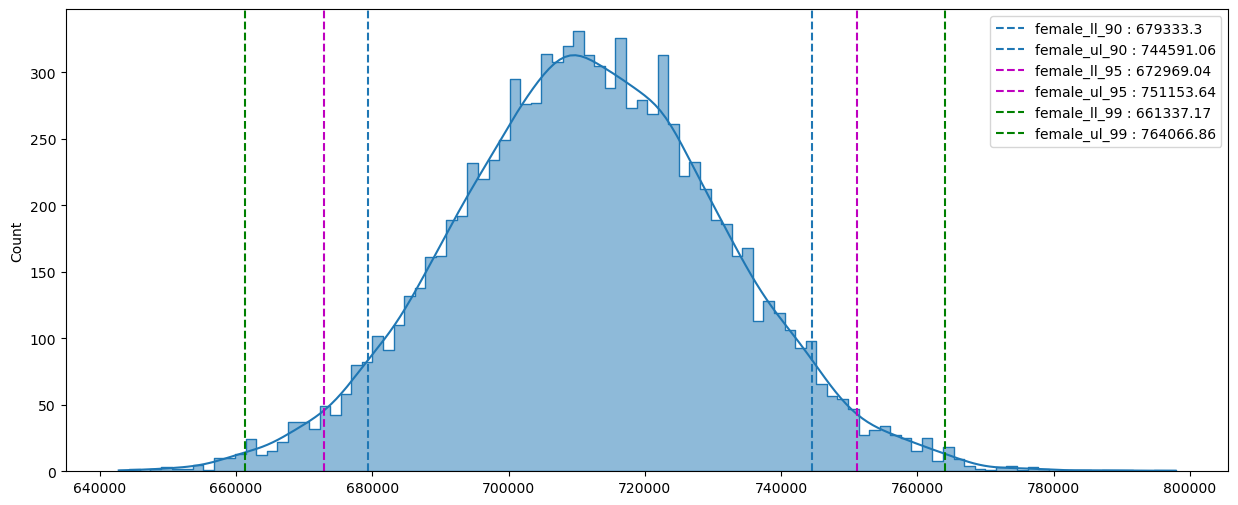

In [84]:
plt.figure(figsize = (15, 6))     

sns.histplot(means_female, kde = True, bins = 100, fill = True, element = 'step')
    
female_ll_90 = np.percentile(means_female, 5)
    
female_ul_90 = np.percentile(means_female, 95)
   
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
    
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')

female_ll_95 = np.percentile(means_female, 2.5)
female_ul_95 = np.percentile(means_female, 97.5)
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')


female_ll_99 = np.percentile(means_female, 0.5)
female_ul_99 = np.percentile(means_female, 99.5)
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()    
plt.plot() 

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each female customer on Black Friday at Walmart, despite having data for only 1666 female individuals. This provides us with a reasonable approximation of the range within which the total purchase of each female customer falls, with a certain level of confidence.

In [85]:
print(f"The population mean of total spending of each female will be approximately = {np.round(np.mean(means_female), 2)} ")

The population mean of total spending of each female will be approximately = 711891.92 


- Comparison of distributions of male's total purchase amount and female's total purchase amount

[]

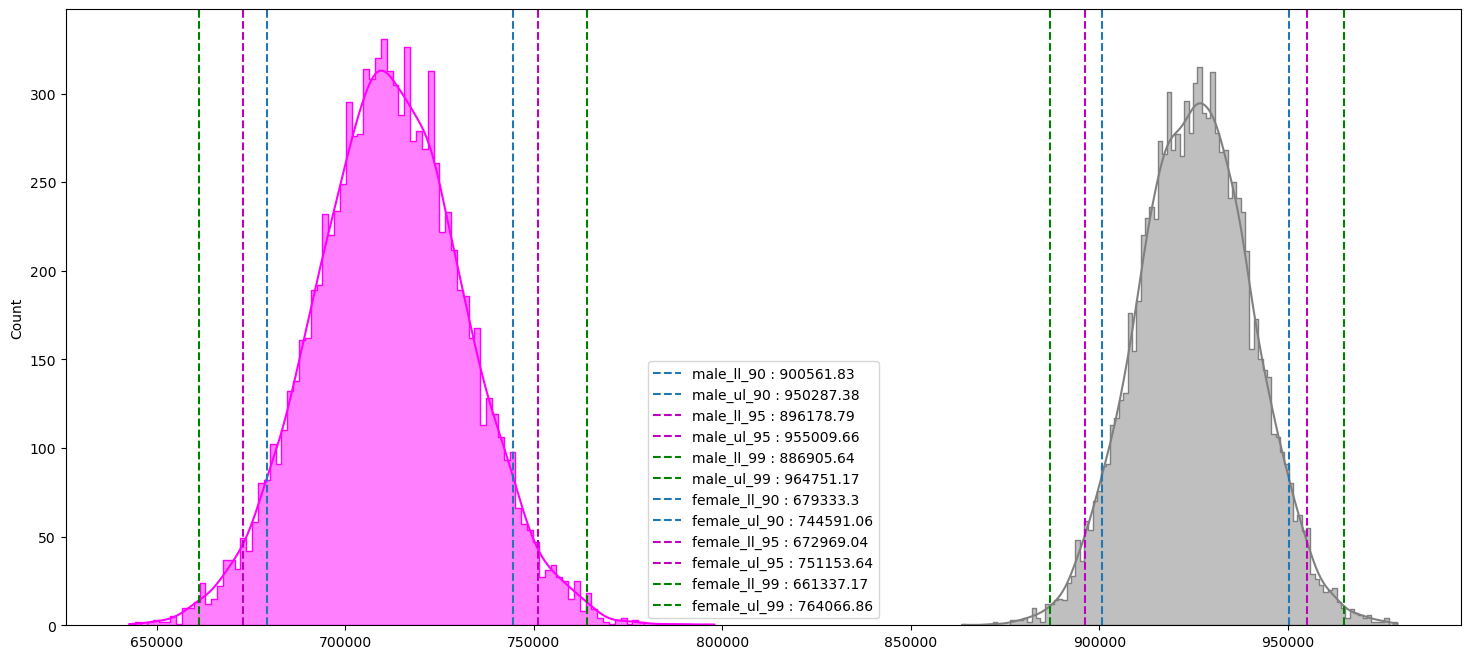

In [86]:
plt.figure(figsize = (18, 8))

sns.histplot(means_male, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'gray',
             legend = True)

plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')

sns.histplot(means_female, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'magenta',
             legend = True)

plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.plot()

It can be clearly seen from the above chart that the distribution of males' total purchase amount lies well towards the right of females' total purchase amount. We can conclude that, on average, males tend to spend more on purchases compared to females. This observation suggests a potential difference in spending behavior between genders.

There could be several reasons why males are spending more than females:

- <b>Product preferences</b>: Males may have a higher tendency to purchase products that are generally more expensive or fall into higher price categories. This could include items such as electronics, gadgets, or luxury goods.

- <b>Income disparity</b>: There may be an income disparity between males and females, with males having higher earning potential or occupying higher-paying job roles. This can lead to a difference in purchasing power and ability to spend more on products.

- <b>Consumption patterns</b>: Males might exhibit different consumption patterns, such as being more inclined towards hobbies or interests that require higher spending, such as sports equipment, gaming, or collectibles.

- <b>Marketing and advertising targeting</b>: Advertisers and marketers may target males with products or services that are positioned at higher price points. This targeted marketing approach can influence purchasing decisions and contribute to males spending more.

It's important to note that these reasons are general observations and may not apply universally. Individual preferences, personal financial situations, and various other factors can also influence spending patterns.

<b>Determining the mean purchase made by each user belonging to different Marital Status </b>

In [87]:
df_single = df.loc[df['Marital_Status'] == 'Single']
df_married = df.loc[df['Marital_Status'] == 'Married']

In [88]:
df_single = df_single.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_married = df_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

<b>For Singles</b>

In [89]:
df_single

,User_ID,Total_Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000006,379930
4,1000009,594099
...,...,...
3412,1006034,197086
3413,1006035,956645
3414,1006037,1119538
3415,1006038,90034


- How the deviations vary for different sample sizes?

In [90]:
mean_purchases = []
for sample_size in range(50, 3000):
    sample_mean = df_single['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

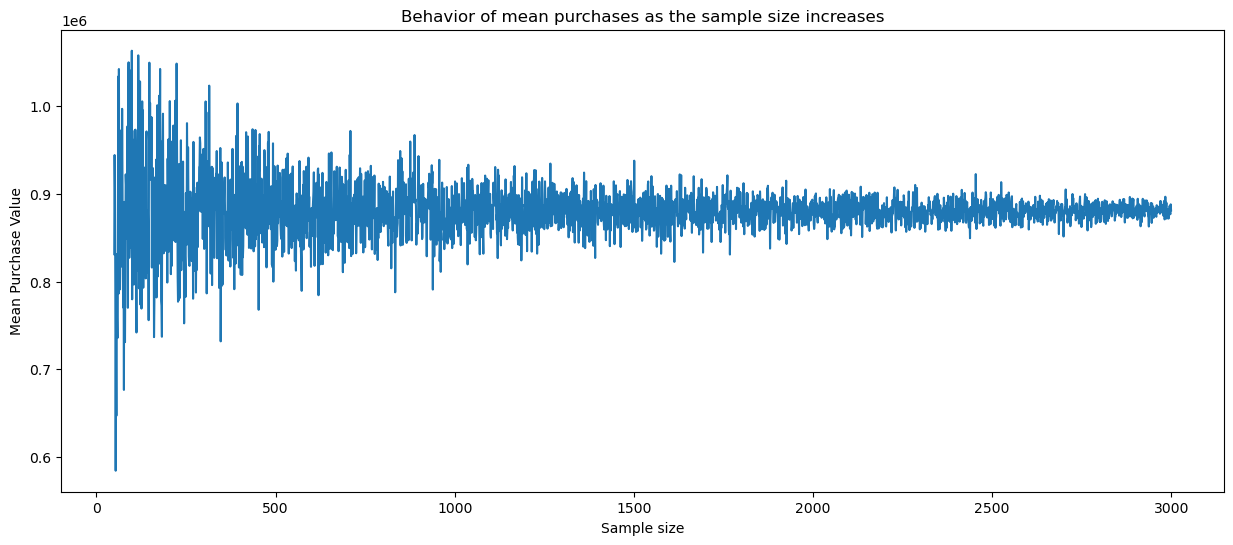

In [91]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 3000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

- Finding the confidence interval of each single's total spending on the Black Friday

In [92]:
single_means = []
size = df_single['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_single['Total_Purchase'].sample(size, replace = True).mean()
    single_means.append(sample_mean)

[]

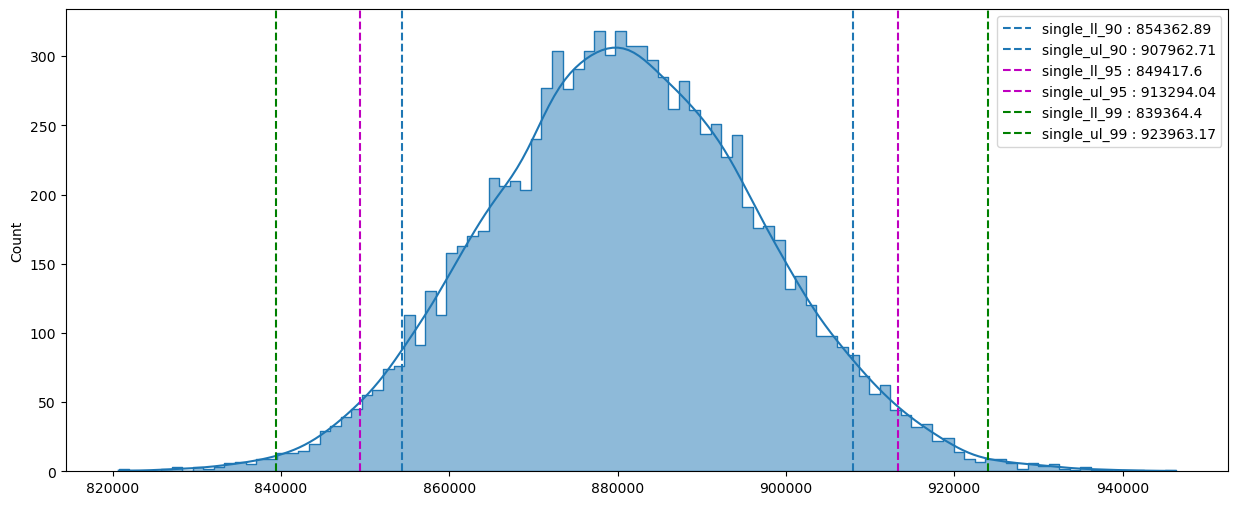

In [93]:
plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(single_means, kde = True, bins = 100, fill = True, element = 'step')
    
single_ll_90 = np.percentile(single_means, 5)

single_ul_90 = np.percentile(single_means, 95)

plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
  
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')

single_ll_95 = np.percentile(single_means, 2.5)
single_ul_95 = np.percentile(single_means, 97.5)
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--', color = 'm')


single_ll_99 = np.percentile(single_means, 0.5)
single_ul_99 = np.percentile(single_means, 99.5)
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()    
plt.plot()

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each single customer on Black Friday at Walmart, despite having data for only 3417 individuals having single as marital status. This provides us with a reasonable approximation of the range within which the total purchase of each single customer falls, with a certain level of confidence.

In [94]:
print(f"The population mean of total spending of each single will be approximately = {np.round(np.mean(single_means), 2)} ")

The population mean of total spending of each single will be approximately = 880820.66 


<b> For Married </b>

In [95]:
df_married

,User_ID,Total_Purchase
0,1000004,206468
1,1000005,821001
2,1000007,234668
3,1000008,796593
4,1000010,2169510
...,...,...
2469,1006029,157436
2470,1006030,737361
2471,1006033,501843
2472,1006036,4116058


- How the deviations vary for different sample sizes?

In [96]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_married['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

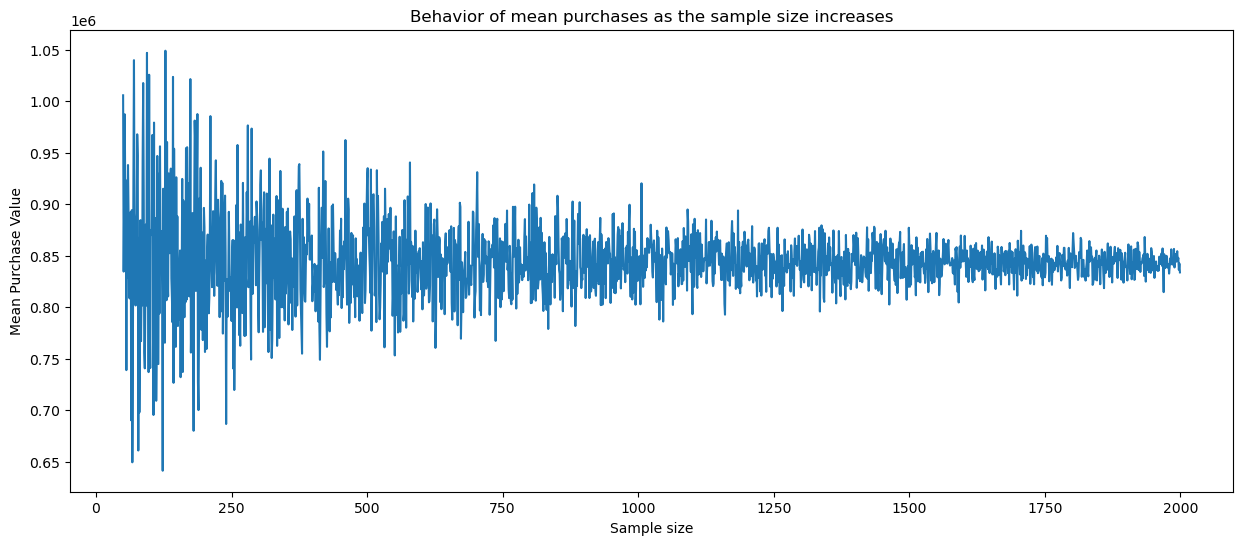

In [97]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

- Finding the confidence interval of each married's total spending on the Black Friday

In [98]:
married_means = []
size = df_married['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_married['Total_Purchase'].sample(size, replace = True).mean()
    married_means.append(sample_mean)

[]

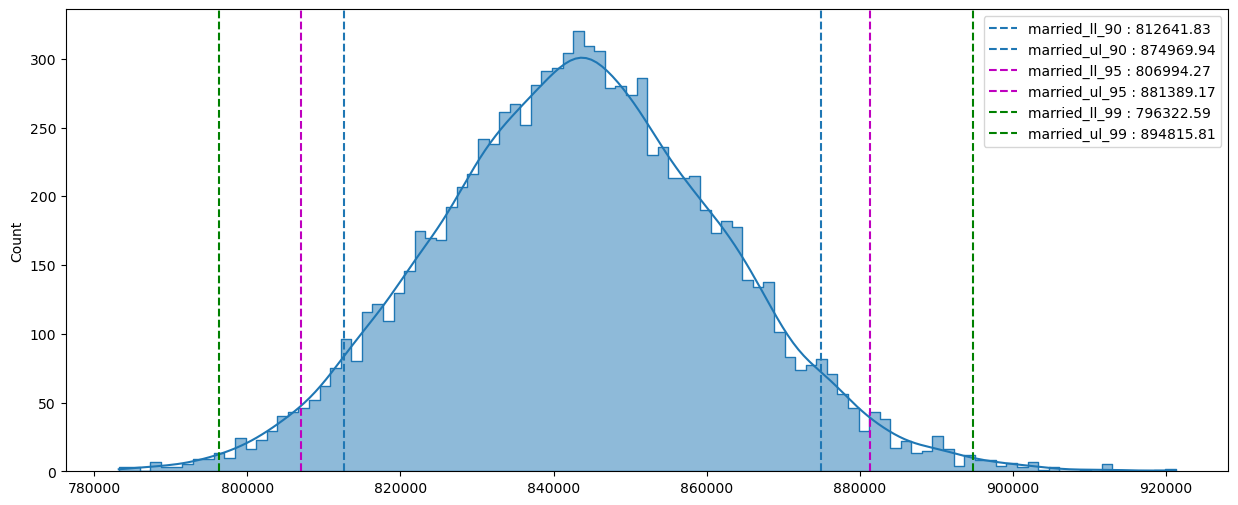

In [99]:
plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(married_means, kde = True, bins = 100, fill = True, element = 'step')

married_ll_90 = np.percentile(married_means, 5)
    
married_ul_90 = np.percentile(married_means, 95)
  
plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--')

plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--')

married_ll_95 = np.percentile(married_means, 2.5)
married_ul_95 = np.percentile(married_means, 97.5)
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'm')


married_ll_99 = np.percentile(married_means, 0.5)
married_ul_99 = np.percentile(married_means, 99.5)
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()    
plt.plot()

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each married customer on Black Friday at Walmart, despite having data for only 2474 individuals having married as marital status. This provides us with a reasonable approximation of the range within which the total purchase of each married customer falls, with a certain level of confidence.

In [100]:
print(f"The population mean of total spending of each male will be approximately = {np.round(np.mean(married_means), 2)} ")

The population mean of total spending of each male will be approximately = 843423.55 


<b> Comparison of distributions of single's total purchase amount and married's total purchase amount </b>

[]

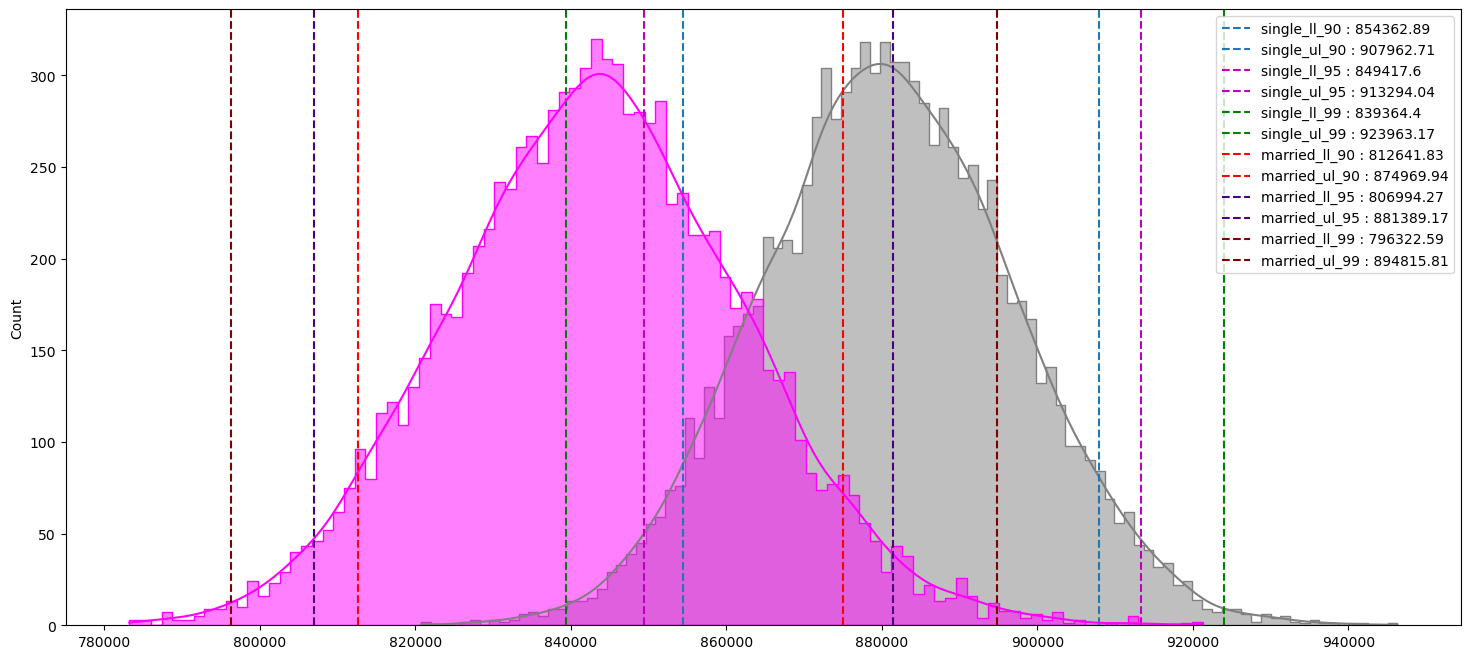

In [101]:
plt.figure(figsize = (18, 8))

sns.histplot(single_means, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'gray',
             legend = True)

plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--', color = 'g')

sns.histplot(married_means, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'magenta',
             legend = True)

plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'maroon')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'maroon')

plt.legend()
plt.plot()

It can be inferred from the above chart that the distributions of singles' total spending and married individuals' total spending overlap. It suggests that there is no significant difference in spending habits between these two groups. Here are some possible inferences that can be drawn from this:

- <b>Relationship status does not strongly influence spending:</b> Being single or married does not appear to have a substantial impact on individuals' spending patterns. Other factors such as income, personal preferences, and financial priorities may play a more significant role in determining spending habits.

- <b>Similar consumption patterns:</b> Singles and married individuals may have similar lifestyles and consumption patterns, leading to comparable spending behaviors. They may allocate their income in comparable ways, making similar purchasing decisions and spending on similar categories of products or services.

- <b>Financial considerations:</b> Both singles and married individuals may have similar financial responsibilities and constraints, leading to similar spending levels. They may have similar obligations such as housing costs, bills, and other financial commitments, which influence their overall spending capacity.

- <b>Individual differences outweigh relationship status:</b> Other individual characteristics, such as personal values, interests, and financial habits, may have a more significant impact on spending behavior than relationship status. These factors can vary widely within each group, resulting in overlapping spending distributions.

<b> Determining the mean purchase made by each user based on their age groups: </b>

In [102]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [103]:
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']

In [104]:
df_age_0_to_17 = df_age_0_to_17.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_18_to_25 = df_age_18_to_25.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_36_to_45 = df_age_36_to_45.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_46_to_50 = df_age_46_to_50.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_51_to_55 = df_age_51_to_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_above_55 = df_age_above_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

- <b> For Age Group 0 - 17 years </b>

In [105]:
df_age_0_to_17

,User_ID,Total_Purchase
0,1000001,334093
1,1000019,1458069
2,1000051,200772
3,1000075,1035584
4,1000086,294063
...,...,...
213,1005844,476231
214,1005953,629161
215,1005973,270475
216,1005989,466195


How the deviations vary for different sample sizes?

In [106]:
mean_purchases = []
for sample_size in range(50, 200):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

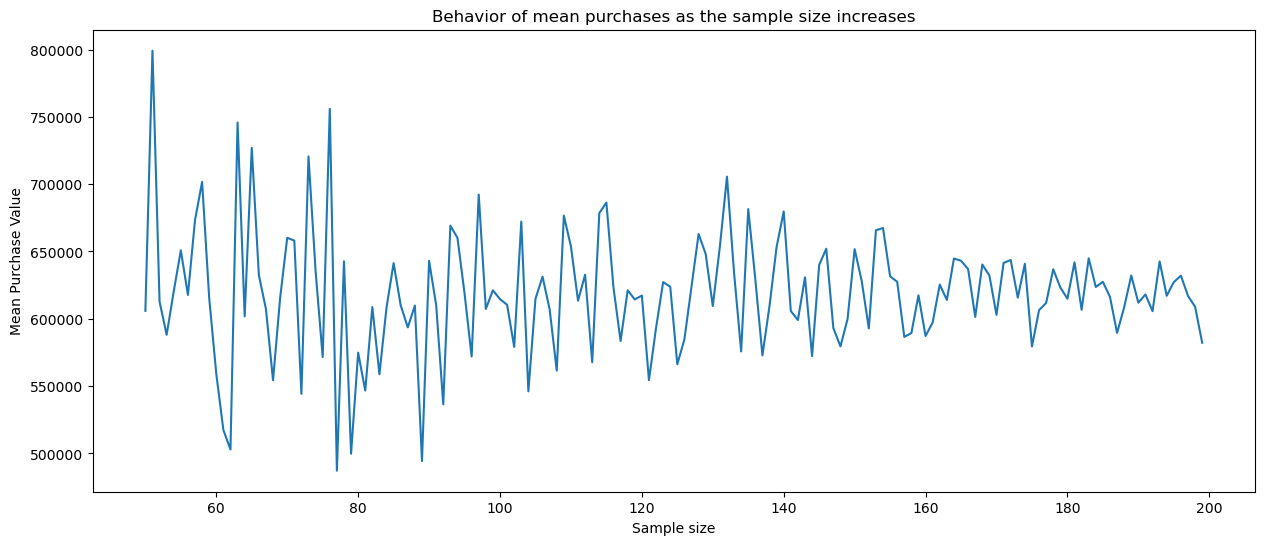

In [107]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 200), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 0 - 17 on the Black Friday

In [108]:
means = []
size = df_age_0_to_17['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

[]

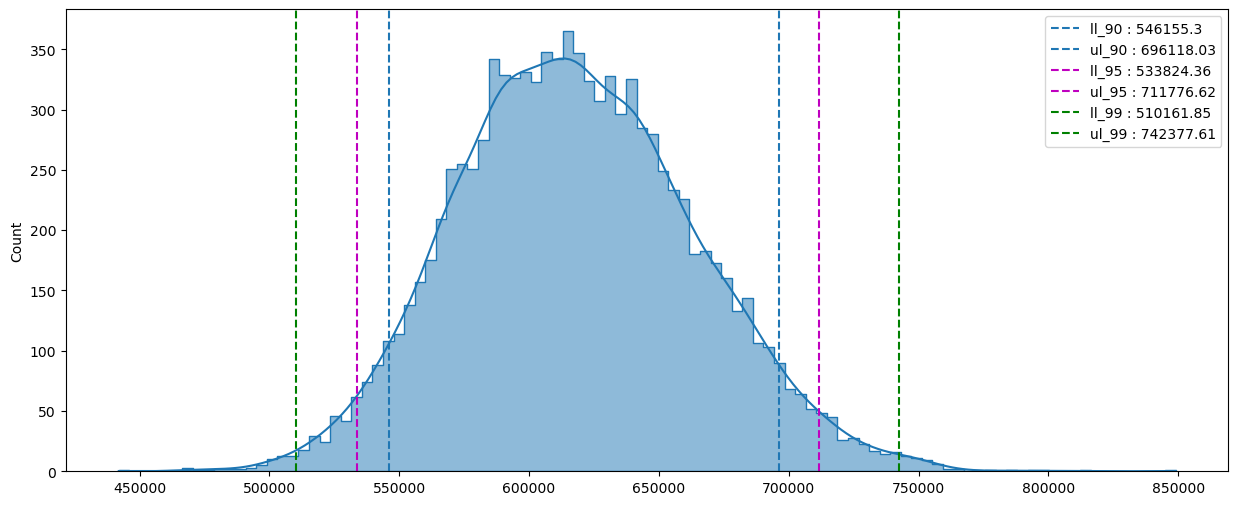

In [109]:
plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')
    
ll_90 = np.percentile(means, 5)

ul_90 = np.percentile(means, 95)

plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
 
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()    
plt.plot() 

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 0 - 17 years on Black Friday at Walmart, despite having data for only 218 individuals having age group 0 - 17 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 0 - 17 years falls, with a certain level of confidence.

In [110]:
print(f"The population mean of total spending of each customer in age group 0 -17 will be approximately = {np.round(np.mean(means), 2)} ")

The population mean of total spending of each customer in age group 0 -17 will be approximately = 618131.17 


- <b> For Age Group 18 - 25 years </b>

In [111]:
df_age_18_to_25

,User_ID,Total_Purchase
0,1000018,1979047
1,1000021,127099
2,1000022,1279914
3,1000025,534706
4,1000034,807983
...,...,...
1064,1005998,702901
1065,1006008,266306
1066,1006027,265201
1067,1006028,362972


How the deviations vary for different sample sizes?

In [112]:
mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

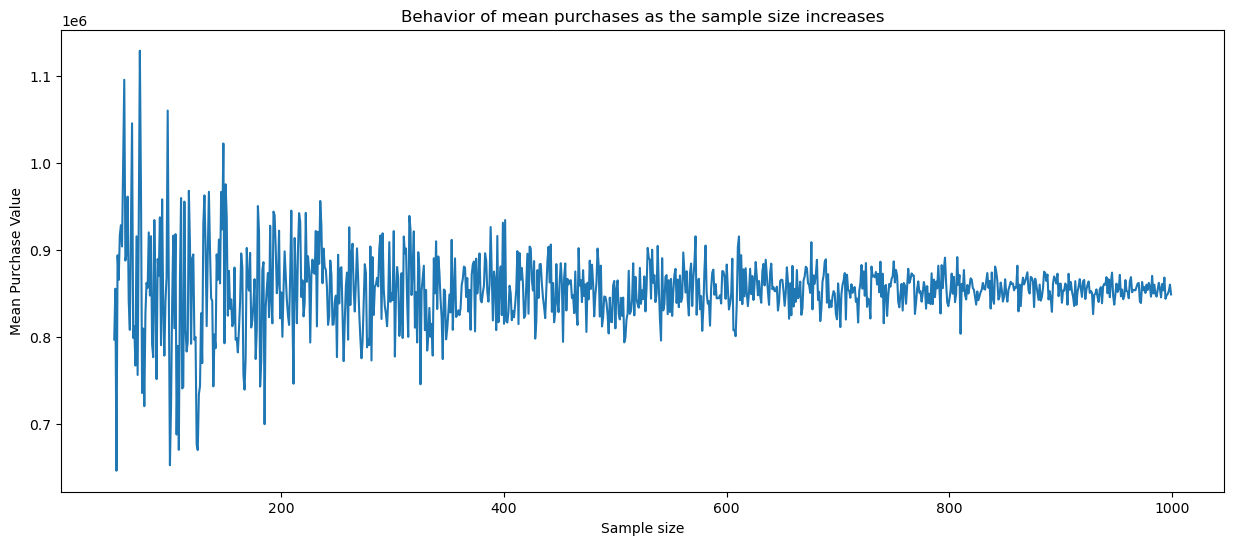

In [113]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 18 - 25 on the Black Friday

In [114]:
means = []
size = df_age_18_to_25['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

[]

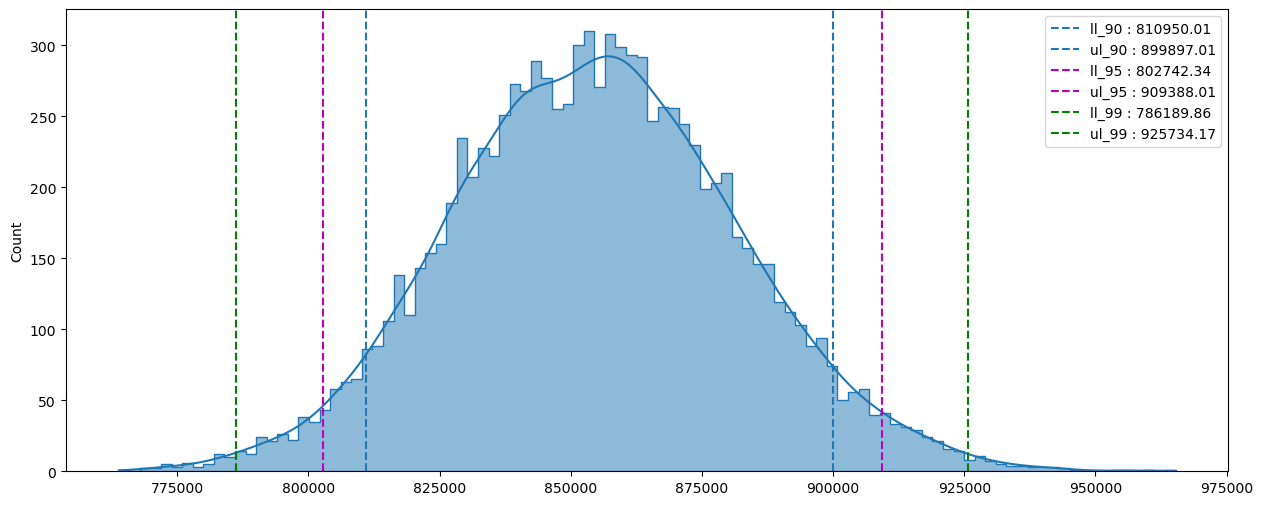

In [115]:
plt.figure(figsize = (15, 6))   

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')
    
ll_90 = np.percentile(means, 5)
   
ul_90 = np.percentile(means, 95)
   
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
   
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot() 

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 18 - 25 years on Black Friday at Walmart, despite having data for only 1069 individuals having age group 18 - 25 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 18 - 25 years falls, with a certain level of confidence.

In [116]:
print(f"The population mean of total spending of each customer in age group 18 - 25 will be approximately = {np.round(np.mean(means), 2)} ")

The population mean of total spending of each customer in age group 18 - 25 will be approximately = 854681.79 


- <b> For Age Group 26 - 35 years </b>

In [117]:
df_age_26_to_35

,User_ID,Total_Purchase
0,1000003,341635
1,1000005,821001
2,1000008,796593
3,1000009,594099
4,1000011,557023
...,...,...
2048,1006030,737361
2049,1006034,197086
2050,1006035,956645
2051,1006036,4116058


How the deviations vary for different sample sizes?

In [118]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

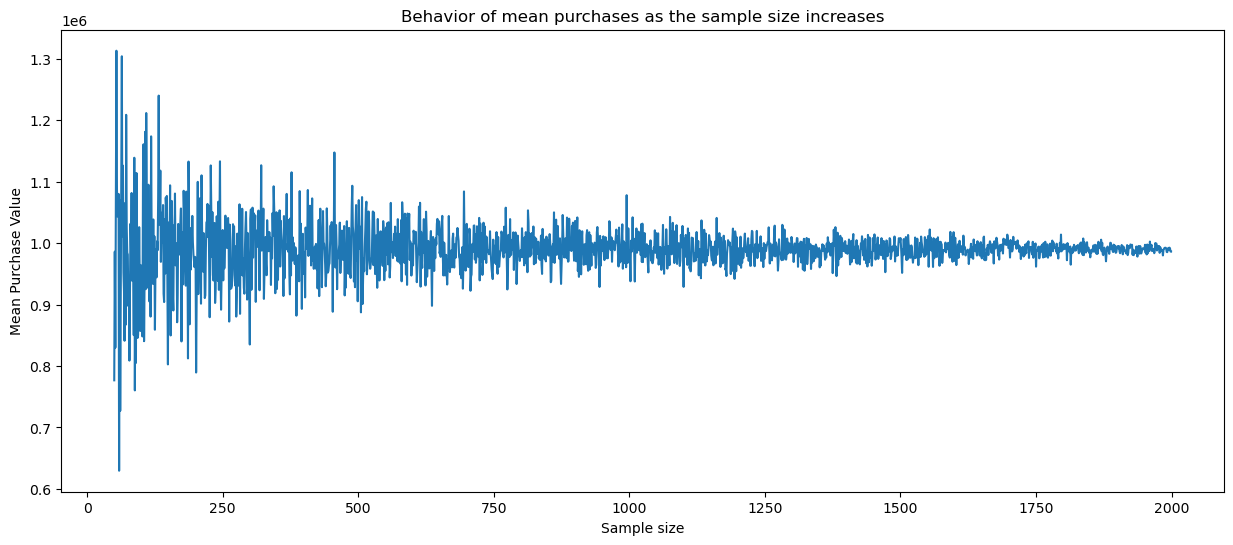

In [119]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 26 - 35 on the Black Friday

In [120]:
means = []
size = df_age_26_to_35['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

[]

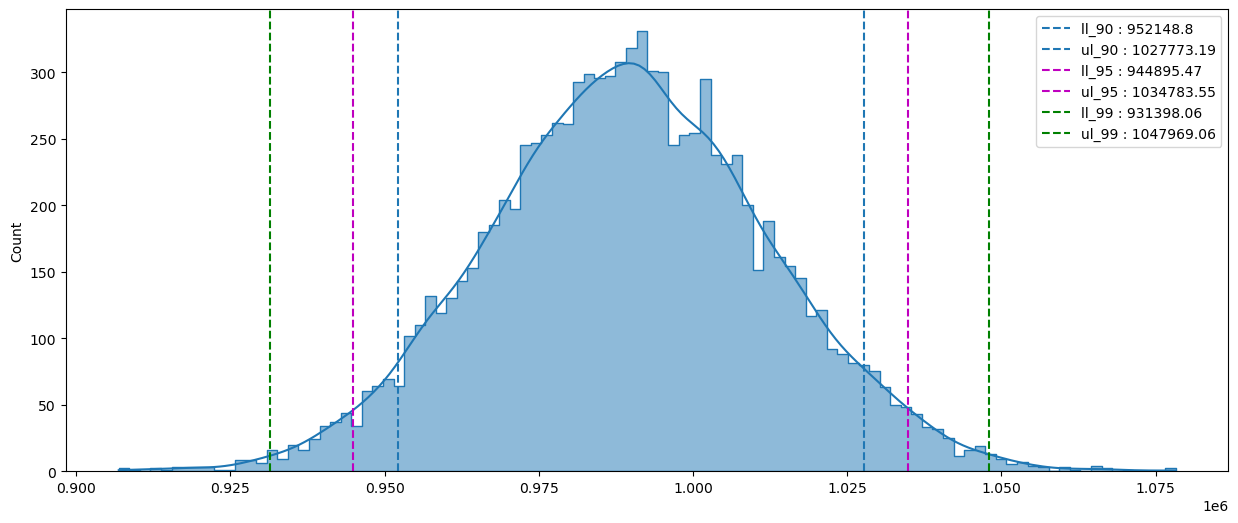

In [121]:
plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')
    
ll_90 = np.percentile(means, 5)
   
ul_90 = np.percentile(means, 95)

plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()    
plt.plot()  

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 26 - 35 years on Black Friday at Walmart, despite having data for only 2053 individuals having age group 26 - 35 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 26 - 35 years falls, with a certain level of confidence.

In [122]:
print(f"The population mean of total spending of each customer in age group 26 - 35 will be approximately = {np.round(np.mean(means), 2)} ")

The population mean of total spending of each customer in age group 26 - 35 will be approximately = 989512.9 


- <b> For Age Group 36 - 45 years </b>

In [123]:
df_age_36_to_45

,User_ID,Total_Purchase
0,1000007,234668
1,1000010,2169510
2,1000014,127629
3,1000016,150490
4,1000023,1670998
...,...,...
1162,1006011,1198714
1163,1006012,127920
1164,1006017,160230
1165,1006018,975585


How the deviations vary for different sample sizes?

In [124]:
mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

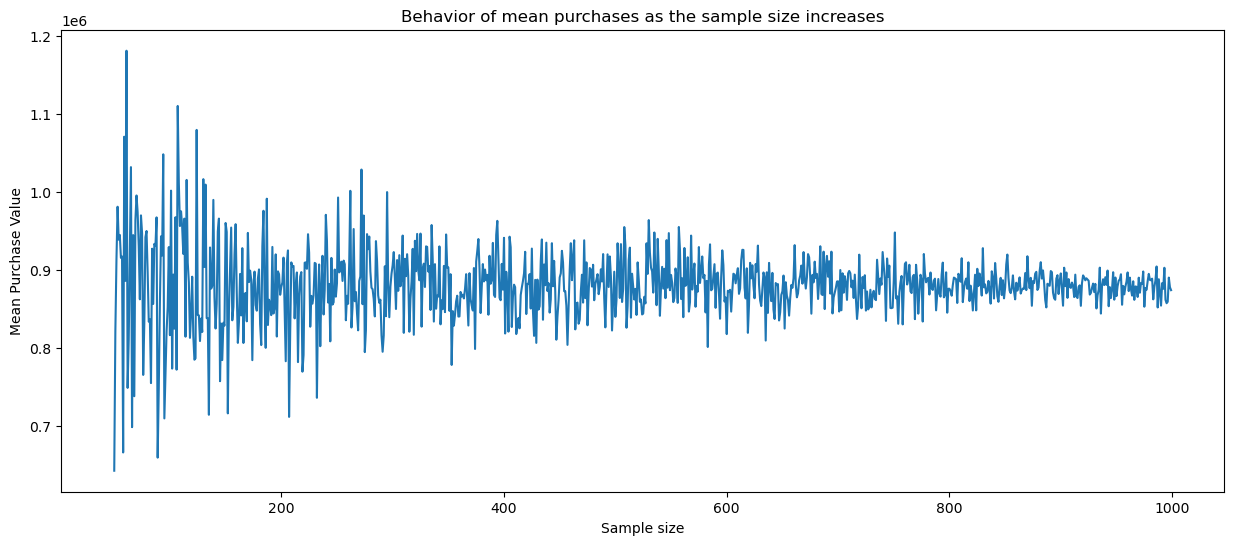

In [125]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 36 - 45 on the Black Friday

In [126]:
means = []
size = df_age_36_to_45['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

[]

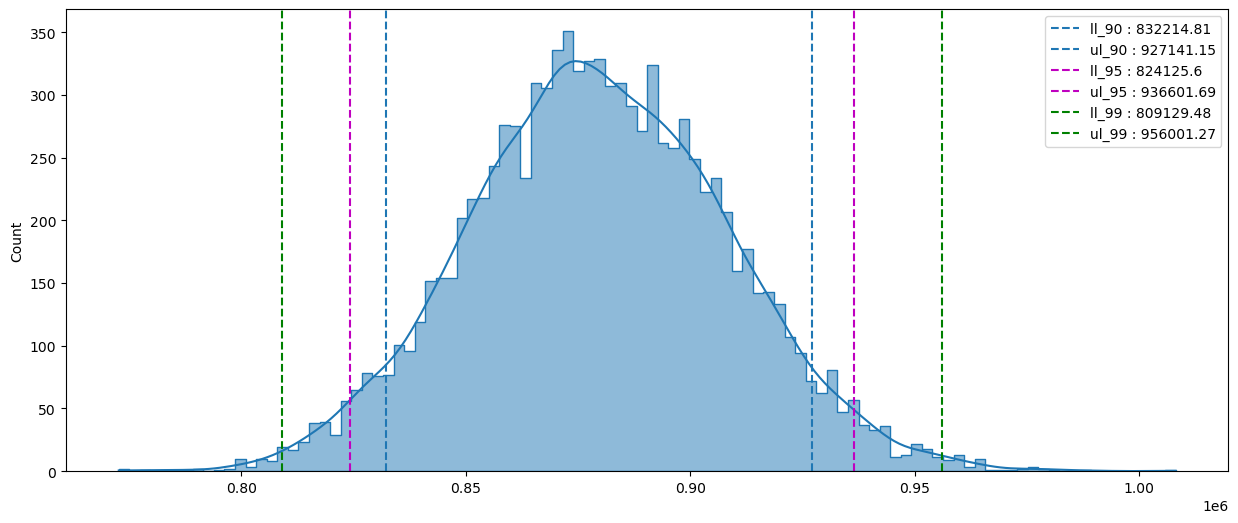

In [127]:
plt.figure(figsize = (15, 6))     

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')
    
ll_90 = np.percentile(means, 5)
   
ul_90 = np.percentile(means, 95)

plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')

plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot()

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 36 - 45 years on Black Friday at Walmart, despite having data for only 1167 individuals having age group 36 - 45 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 36 - 45 years falls, with a certain level of confidence.

In [128]:
print(f"The population mean of total spending of each customer in age group 36 - 45 will be approximately = {np.round(np.mean(means), 2)} ")

The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879619.57 


- <b> For Age Group 46 - 50 years </b>

In [129]:
df_age_46_to_50

,User_ID,Total_Purchase
0,1000004,206468
1,1000013,713927
2,1000033,1940418
3,1000035,821303
4,1000044,1180380
...,...,...
526,1006014,528238
527,1006016,3770970
528,1006032,517261
529,1006037,1119538


How the deviations vary for different sample sizes?

In [130]:
mean_purchases = []
for sample_size in range(50, 500):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

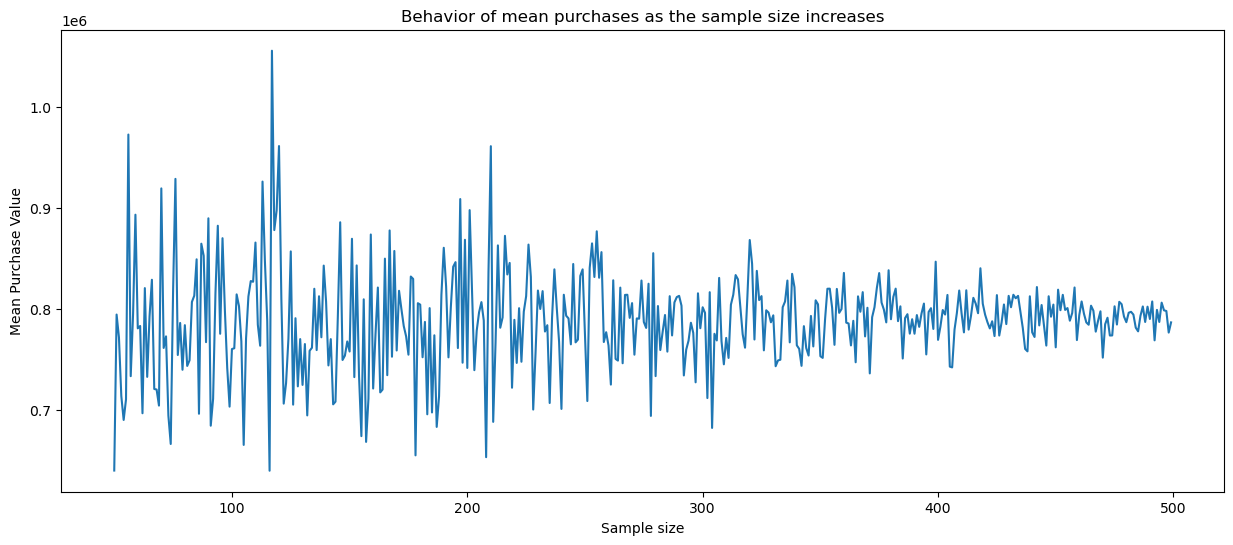

In [131]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 500), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 46 - 50 on the Black Friday

In [132]:
means = []
size = df_age_46_to_50['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

[]

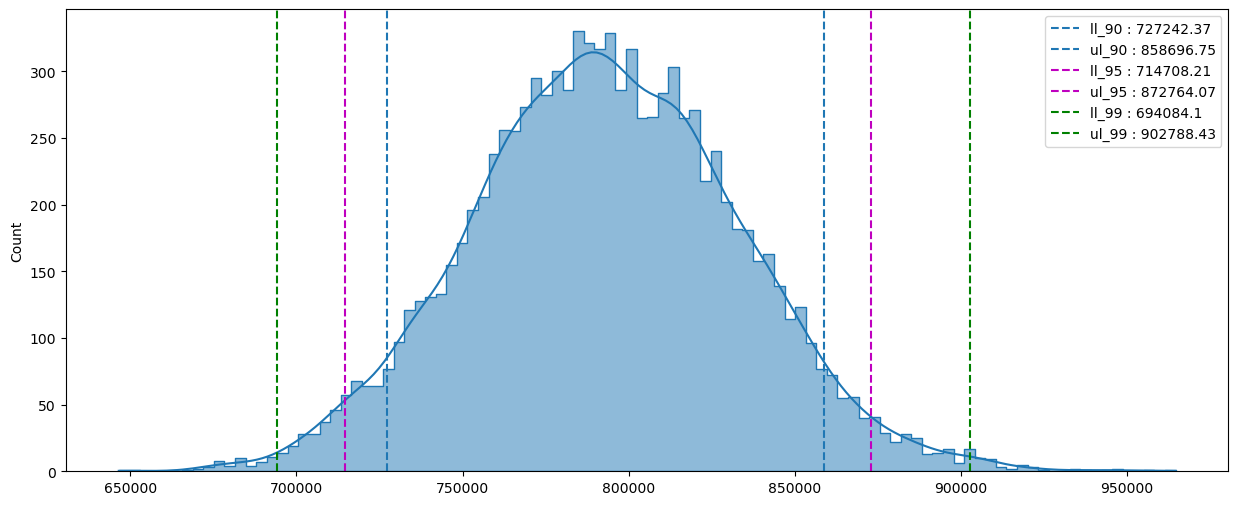

In [133]:
plt.figure(figsize = (15, 6))     

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

ll_90 = np.percentile(means, 5)
    
ul_90 = np.percentile(means, 95)
    
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
  
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()   
plt.plot() 

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 46 - 50 years on Black Friday at Walmart, despite having data for only 531 individuals having age group 46 - 50 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 46 - 50 years falls, with a certain level of confidence.

In [134]:
print(f"The population mean of total spending of each customer in age group 46 - 50 will be approximately = {np.round(np.mean(means), 2)} ")

The population mean of total spending of each customer in age group 46 - 50 will be approximately = 792922.48 


# Missing Value & Outlier Detection 

In [135]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No Null values found in any columns

In [136]:
df.duplicated().sum()

0

No duplicates have been observed

<b> Outliers </b>
- Outliers for other categorical data are mentioned inline with the respective analysis

In [140]:
# Outlier calculation for Product_Category using Inter Quartile Range
q_75, q_25 = np.percentile(df['Product_Category'], [75 ,25])
product_iqr = q_75 - q_25
print("Inter Quartile Range for Product Category is", product_iqr)

Inter Quartile Range for Product Category is 7.0


# Conditional and Marginal Probabilities¶

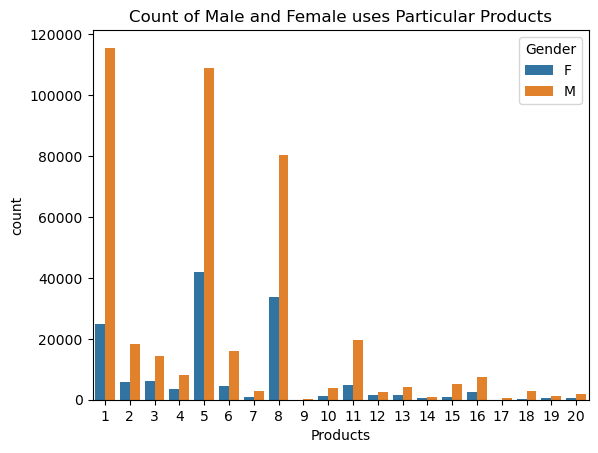

In [143]:
sns.countplot(x = "Product_Category", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [144]:
pd.crosstab([df.Product_Category],df.Gender,margins=True)

Gender,F,M,All
Product_Category,,,
1,24831,115547,140378
2,5658,18206,23864
3,6006,14207,20213
4,3639,8114,11753
5,41961,108972,150933
6,4559,15907,20466
7,943,2778,3721
8,33558,80367,113925
9,70,340,410


In [145]:
np.round(((pd.crosstab(df.Product_Category,df.Gender,margins=True))/180)*100,2)

Gender,F,M,All
Product_Category,,,
1,13795.00,64192.78,77987.78
2,3143.33,10114.44,13257.78
3,3336.67,7892.78,11229.44
4,2021.67,4507.78,6529.44
5,23311.67,60540.00,83851.67
6,2532.78,8837.22,11370.00
7,523.89,1543.33,2067.22
8,18643.33,44648.33,63291.67
9,38.89,188.89,227.78


In [147]:
np.round((pd.crosstab([df.Product_Category],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,F,M,All
Product_Category,,,
1,18.28,27.89,25.52
2,4.17,4.39,4.34
3,4.42,3.43,3.67
4,2.68,1.96,2.14
5,30.90,26.31,27.44
6,3.36,3.84,3.72
7,0.69,0.67,0.68
8,24.71,19.40,20.71
9,0.05,0.08,0.07


# Answering questions 

1. Are women spending more money per transaction than men? Why or Why not?

In [151]:
average_purchase_by_gender = df.groupby('Gender')['Purchase'].mean()

print("Average purchase amount per transaction:")
print(average_purchase_by_gender)

if average_purchase_by_gender['F'] > average_purchase_by_gender['M']:
    print("Yes, women are spending more money per transaction than men.")
elif average_purchase_by_gender['F'] < average_purchase_by_gender['M']:
    print("No, men are spending more money per transaction than women.")
else:
    print("There is no significant difference in the average purchase amount per transaction between men and women.")

Average purchase amount per transaction:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64
No, men are spending more money per transaction than women.


2. Confidence intervals and distribution of the mean of the expenses by female and male customers

In [156]:
# Separate data for female and male customers
expenses_female = df[df['Gender'] == 'F']['Purchase']
expenses_male = df[df['Gender'] == 'M']['Purchase']

# Calculate mean and standard deviation
mean_female = np.mean(expenses_female)
mean_male = np.mean(expenses_male)
std_dev_female = np.std(expenses_female, ddof=1)  # ddof=1 for sample standard deviation
std_dev_male = np.std(expenses_male, ddof=1)

# Calculate standard error of the mean (SEM)
sem_female = std_dev_female / np.sqrt(len(expenses_female))
sem_male = std_dev_male / np.sqrt(len(expenses_male))

# Set confidence level and degrees of freedom
confidence_level = 0.95  # 95% confidence level
df_female = len(expenses_female) - 1
df_male = len(expenses_male) - 1

# Calculate t-score for given confidence level and degrees of freedom
t_score_female = t.ppf((1 + confidence_level) / 2, df_female)
t_score_male = t.ppf((1 + confidence_level) / 2, df_male)

# Calculate margin of error
margin_of_error_female = t_score_female * sem_female
margin_of_error_male = t_score_male * sem_male

# Calculate confidence intervals
ci_female = (mean_female - margin_of_error_female, mean_female + margin_of_error_female)
ci_male = (mean_male - margin_of_error_male, mean_male + margin_of_error_male)

# Print results
print("Female Customers:")
print(f"Mean Expense: {mean_female:.2f}")
print(f"Standard Error of the Mean (SEM): {sem_female:.2f}")
print(f"95% Confidence Interval: {ci_female}")

print("\nMale Customers:")
print(f"Mean Expense: {mean_male:.2f}")
print(f"Standard Error of the Mean (SEM): {sem_male:.2f}")
print(f"95% Confidence Interval: {ci_male}")

Female Customers:
Mean Expense: 8734.57
Standard Error of the Mean (SEM): 12.94
95% Confidence Interval: (8709.21132117373, 8759.92020913722)

Male Customers:
Mean Expense: 9437.53
Standard Error of the Mean (SEM): 7.91
95% Confidence Interval: (9422.019402055814, 9453.032678888716)


3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

- The confidence intervals of average male and female spending do not overlap, indicating a potential significant difference in spending habits. To leverage this, Walmart can tailor marketing, product placement, and customer engagement strategies to better cater to the preferences of male and female customers, ultimately increasing sales and customer satisfaction.

4. Results when the same activity is performed for Married vs Unmarried

In [159]:
# Separate data for married and unmarried customers
expenses_married = df[df['Marital_Status'] == 'Married']['Purchase']
expenses_unmarried = df[df['Marital_Status'] == 'Single']['Purchase']

# Calculate mean and standard deviation
mean_married = np.mean(expenses_married)
mean_unmarried = np.mean(expenses_unmarried)
std_dev_married = np.std(expenses_married, ddof=1)  # ddof=1 for sample standard deviation
std_dev_unmarried = np.std(expenses_unmarried, ddof=1)

# Set confidence level and degrees of freedom
confidence_level = 0.95  # 95% confidence level
df_married = len(expenses_married) - 1
df_unmarried = len(expenses_unmarried) - 1

# Calculate standard error of the mean (SEM)
sem_married = std_dev_married / np.sqrt(len(expenses_married))
sem_unmarried = std_dev_unmarried / np.sqrt(len(expenses_unmarried))

# Calculate t-score for given confidence level and degrees of freedom
t_score_married = t.ppf((1 + confidence_level) / 2, df_married)
t_score_unmarried = t.ppf((1 + confidence_level) / 2, df_unmarried)

# Calculate margin of error
margin_of_error_married = t_score_married * sem_married
margin_of_error_unmarried = t_score_unmarried * sem_unmarried

# Calculate confidence intervals
ci_married = (mean_married - margin_of_error_married, mean_married + margin_of_error_married)
ci_unmarried = (mean_unmarried - margin_of_error_unmarried, mean_unmarried + margin_of_error_unmarried)

# Check if confidence intervals overlap
overlap = ci_married[1] >= ci_unmarried[0] and ci_unmarried[1] >= ci_married[0]

# Print results
print("Married Customers:")
print(f"Mean Expense: {mean_married:.2f}")
print(f"95% Confidence Interval: {ci_married}")

print("\nUnmarried Customers:")
print(f"Mean Expense: {mean_unmarried:.2f}")
print(f"95% Confidence Interval: {ci_unmarried}")

if overlap:
    print("\nThe confidence intervals overlap. There is no significant difference in average spending between married and unmarried customers.")
else:
    print("\nThe confidence intervals do not overlap. There may be a significant difference in average spending between married and unmarried customers.")

Married Customers:
Mean Expense: 9261.17
95% Confidence Interval: (9240.460315792989, 9281.888832371758)

Unmarried Customers:
Mean Expense: 9265.91
95% Confidence Interval: (9248.616353737027, 9283.198884105987)

The confidence intervals overlap. There is no significant difference in average spending between married and unmarried customers.


5. Results when the same activity is performed for Age 

In [160]:
# Define age groups
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Calculate mean and standard deviation for each age group
mean_expenses = []
ci_expenses = []

for age_group in age_groups:
    expenses = df[df['Age'] == age_group]['Purchase']
    mean = np.mean(expenses)
    std_dev = np.std(expenses, ddof=1)  # ddof=1 for sample standard deviation
    sem = std_dev / np.sqrt(len(expenses))
    df_age = len(expenses) - 1
    
    # Calculate t-score for 95% confidence level
    t_score = t.ppf(0.975, df_age)  # 0.975 corresponds to 95% confidence level
    
    # Calculate margin of error
    margin_of_error = t_score * sem
    
    # Calculate confidence interval
    ci = (mean - margin_of_error, mean + margin_of_error)
    
    mean_expenses.append(mean)
    ci_expenses.append(ci)

# Print results
for i, age_group in enumerate(age_groups):
    print(f"{age_group} Age Group:")
    print(f"Mean Expense: {mean_expenses[i]:.2f}")
    print(f"95% Confidence Interval: {ci_expenses[i]}")
    print()

# Check for significant differences
overlap = False
for i in range(len(age_groups)):
    for j in range(i+1, len(age_groups)):
        if ci_expenses[i][1] >= ci_expenses[j][0] and ci_expenses[j][1] >= ci_expenses[i][0]:
            overlap = True
            break

if overlap:
    print("The confidence intervals overlap. There is no significant difference in average spending across age groups.")
else:
    print("The confidence intervals do not overlap. There may be significant differences in average spending across age groups.")

0-17 Age Group:
Mean Expense: 8933.46
95% Confidence Interval: (8851.941436361221, 9014.987844528727)

18-25 Age Group:
Mean Expense: 9169.66
95% Confidence Interval: (9138.40756914702, 9200.919643375557)

26-35 Age Group:
Mean Expense: 9252.69
95% Confidence Interval: (9231.733560884022, 9273.647704855754)

36-45 Age Group:
Mean Expense: 9331.35
95% Confidence Interval: (9301.669084404875, 9361.032305430872)

46-50 Age Group:
Mean Expense: 9208.63
95% Confidence Interval: (9163.08393647555, 9254.167458461105)

51-55 Age Group:
Mean Expense: 9534.81
95% Confidence Interval: (9483.989875153999, 9585.626186766473)

55+ Age Group:
Mean Expense: 9336.28
95% Confidence Interval: (9269.295063935433, 9403.265854963376)

The confidence intervals overlap. There is no significant difference in average spending across age groups.


# Actionable insights 
- For every four purchases made at Walmart on Black Friday, three are made by men and one is made by women.
- 82.33% of all transactions on Black Friday come from customers in 11 specific occupations. These occupations are listed below in descending order of their share of total transactions: 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, and 6.
- More than half of all transactions, specifically 53.75% of the total, come from customers who have been living in their current city for either one or two years.
- 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2.
- There are 1666 unique female customers and 4225 unique male customers. Average number of transactions made by each Male on Black Friday is 98 while for Female it is 82.
- On an average each male makes a total purchase of 925438.92 on Black Friday while for each female the figure is 712269.56.
- 76.72 % of the total revenue is generated from males.
- Out of 5891 unique customers, 42 % of them are Married and 58 % of them are Single.
- Average number of transactions made by each user with marital status Married is 91 and for Single it is 95.
- On an average each Married customer makes a total purchase of 843469.79 on Black Friday while for each Single customer the figure is 880526.31.
- 59.05 % of the total revenue is generated from the customers who are Single.
- Majority of the transactions are made by the customers whose age is between 26 and 45 years.
- About 81.82% of the total transactions are made by customers of age between 18 and 50 years.
- 81.82 % of total unique customers have age between 18 and 50 years.
- Out of all unique customers, 35.85 % belong to the age group of 26 - 35 years, 19.81 % belong to the age group of 36 - 45 years, 18.15 % belong to the age group of 18 - 25 years, 9.01 % belong to the age group of 46 - 50 years.
- Walmart generated 86.21 % of total revenue from customers in range 18 to 50 years on Black Friday.
- 39.87 % of the total revenue is generated from the customers having age group of 26 - 35 years, 20.15 % is generated from 36 - 45 years, 17.93 % from 18 - 25 years, 8.26 % from 46 - 50 years.
- Majority of the total unique customers belong to the city C. 82.26 % of the total unique customers belong to city C and B.
- Walmart generated 41.52 % of the total revenue from the customers belonging to the city B, 32.65 % from city C and 25.83 % from city A on Black Friday.
- Top 5 product categories from which Walmart made 84.36 % of total revenue on Black Friday are 1, 5, 8, 6 and 2.
- The population mean of total spending of each male will be approximately = 925156.36.
- The population mean of total spending of each female will be approximately = 711789.37
- The population mean of total spending of each single will be approximately = 880356.19
- The population mean of total spending of each male will be approximately = 843632.08
- The population mean of total spending of each customer in age group 0 -17 will be approximately = 617797.25
- The population mean of total spending of each customer in age group 18 - 25 will be approximately = 854676.31
- The population mean of total spending of each customer in age group 26 - 35 will be approximately = 989120.36
- The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879434.88
- The population mean of total spending of each customer in age group 46 - 50 will be approximately = 792671.74

# Recommendations

- <b> Social Media Engagement:</b> Connect with customers through social media platforms like Facebook, Instagram, and Twitter. Share engaging content, respond promptly to messages and comments, and run targeted ads to reach your audience effectively.

- <b> Targeted marketing:</b> Since the majority of transactions are made by males, it would be beneficial to tailor marketing strategies to cater to their preferences and needs. This could include specific promotions, product offerings, or advertising campaigns designed to attract male customers.

- <b> Customer Loyalty Program:</b> Launch a loyalty program to reward repeat customers. Offer points for purchases that can be redeemed for discounts or freebies. This incentivizes customers to keep coming back and increases their lifetime value.

- <b> Focus on popular occupations:</b> Given that 82.33% of transactions come from customers in 11 specific occupations, it would be wise to focus marketing efforts on these occupations. Understanding the needs and preferences of individuals in these occupations can help in creating targeted marketing campaigns and customized offers.

- <b> Engage with new residents:</b> As a significant portion of transactions (53.75%) come from customers who have recently moved to the current city, it presents an opportunity to engage with these new residents. Targeted marketing, welcoming offers, and incentives for newcomers can help capture their loyalty and increase their spending.

- <b> Emphasize popular product categories:</b> Since 82.43% of transactions are concentrated in just five product categories, allocating resources and promotions towards these categories can maximize sales potential. Highlighting these popular categories and offering attractive deals can encourage more purchases.

- <b> Increase focus on single customers:</b> Given that 59.05% of total revenue is generated by single customers, dedicating efforts to cater to their needs and preferences can help drive more sales. Understanding their motivations and targeting them with personalized offers can enhance their shopping experience and loyalty.

- <b> Mobile-Friendly Website:</b> Ensure your website is mobile-friendly and optimized for easy navigation on smartphones and tablets. A seamless mobile shopping experience is essential for capturing sales from customers browsing on their mobile devices.

- <b> Customer Satisfaction Surveys:</b> Regularly solicit feedback from customers through surveys or feedback forms. Use this input to identify areas for improvement and make adjustments to enhance the overall customer experience.

- <b> Cross-Promotions and Partnerships:</b> Collaborate with complementary businesses or brands to cross-promote each other's products or services. This expands your reach to new audiences and can result in mutually beneficial sales opportunities.

- <b> Community Involvement:</b> Get involved in local community events, sponsorships, or charitable initiatives. This demonstrates your commitment to giving back and fosters goodwill among local residents, potentially driving more business through word-of-mouth referrals.

- <b> Visual Merchandising:</b> Invest in attractive and visually appealing store displays to showcase your products effectively. Use strategic lighting, signage, and product placement to draw attention to key items and encourage impulse purchases.

- <b> Customer Support:</b> Provide exceptional customer support both in-store and online. Train your staff to be knowledgeable and helpful, and offer multiple channels for customers to reach out with questions or concerns.

- <b> Seasonal Decorations and Themes:</b> Decorate your store according to seasonal themes or holidays to create a festive atmosphere and entice shoppers. Offer seasonal promotions or discounts to capitalize on holiday shopping trends.